In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings('ignore')

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head()

Age          Workclass  Fnlwgt   Education  Education_num  \
0   50   Self-emp-not-inc   83311   Bachelors             13   
1   38            Private  215646     HS-grad              9   
2   53            Private  234721        11th              7   
3   28            Private  338409   Bachelors             13   
4   37            Private  284582     Masters             14   

        Marital_status          Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse     Exec-managerial         Husband   White     Male   
1             Divorced   Handlers-cleaners   Not-in-family   White     Male   
2   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
3   Married-civ-spouse      Prof-specialty            Wife   Black   Female   
4   Married-civ-spouse     Exec-managerial            Wife   White   Female   

   Capital_gain  Capital_loss  Hours_per_week  Native_country  Income  
0             0             0              13   United-States   <=50K  
1             0             0              40   United-States   <=50K  
2             0             0              40   United-States   <=50K  
3             0             0              40            Cuba   <=50K  
4             0             0              40   United-States   <=50K

In [36]:
#checking shape of the dataset
df.shape

(32560, 15)

In [37]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [39]:
df.duplicated().sum()

24

In [40]:
#removing duplicate values
df = df.drop_duplicates()

In [41]:
df.duplicated().sum()

0

In [42]:
df.shape

(32536, 15)

In [15]:
# Checking unique values in every column
for column in df:
    print(f"\nUnique values in {column}:\n", df[column].value_counts())



Unique values in Age:
 36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

Unique values in Workclass:
  Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

Unique values in Fnlwgt:
 123011    13
164190    13
203488    13
121124    12
126675    12
          ..
158040     1
232784     1
325573     1
140176     1
257302     1
Name: Fnlwgt, Length: 21647, dtype: int64

Unique values in Education:
  HS-grad         10494
 Some-college     7282
 Bachelors        5352
 Masters          1722
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           645
 Prof-school       576
 9th               514
 12th              433
 Doctorat

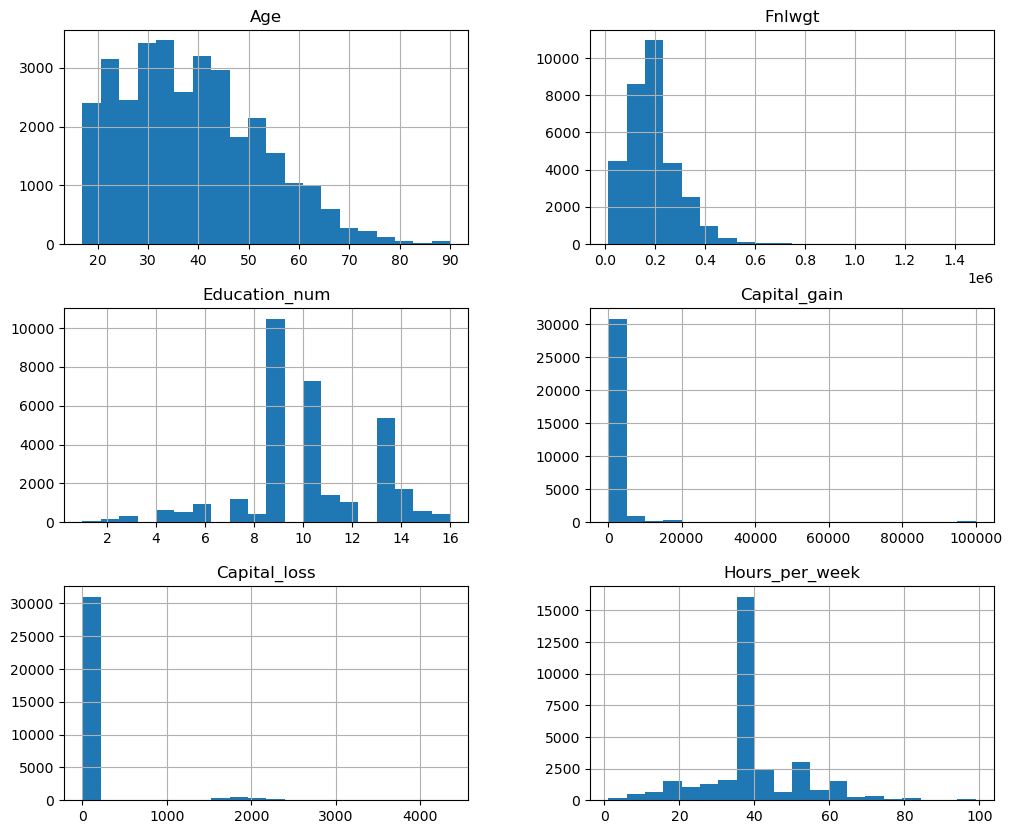

In [16]:
df.hist(figsize=(12, 10), bins=20)
plt.show()

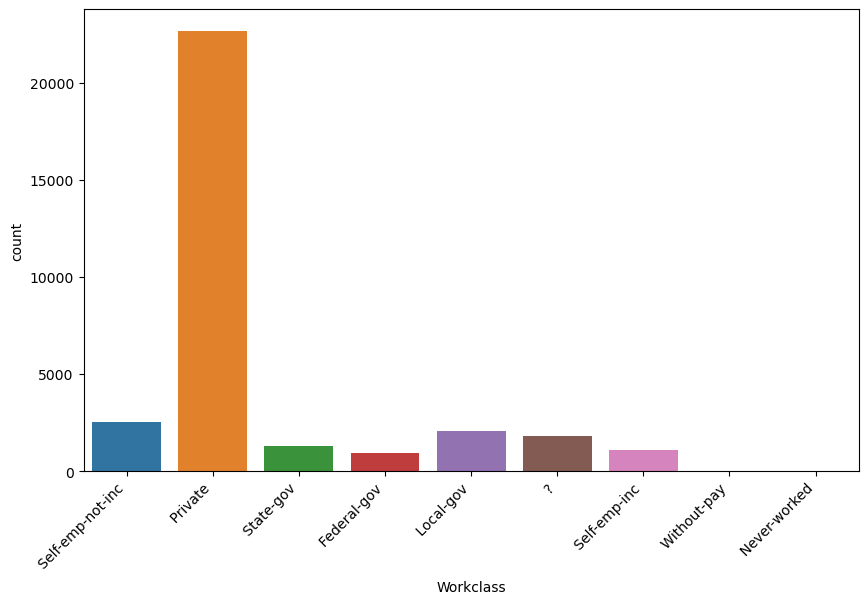

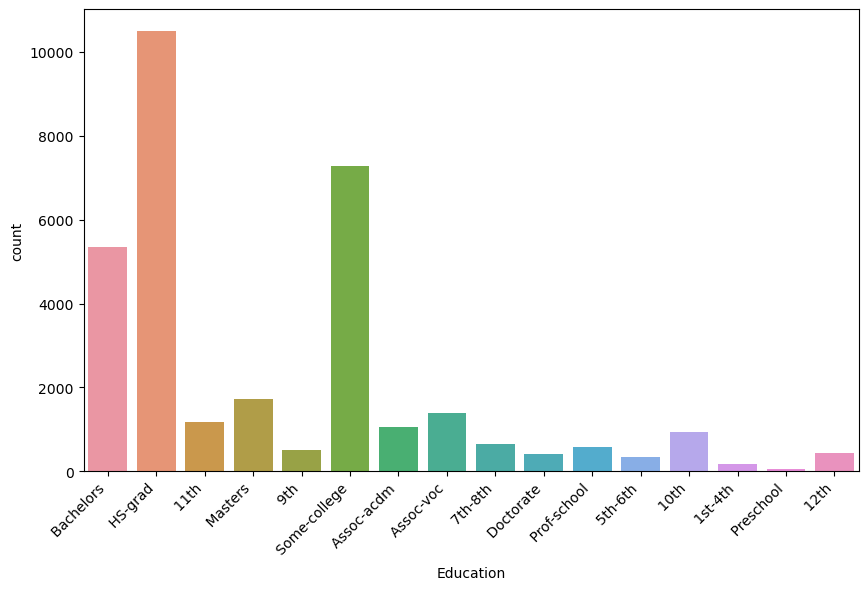

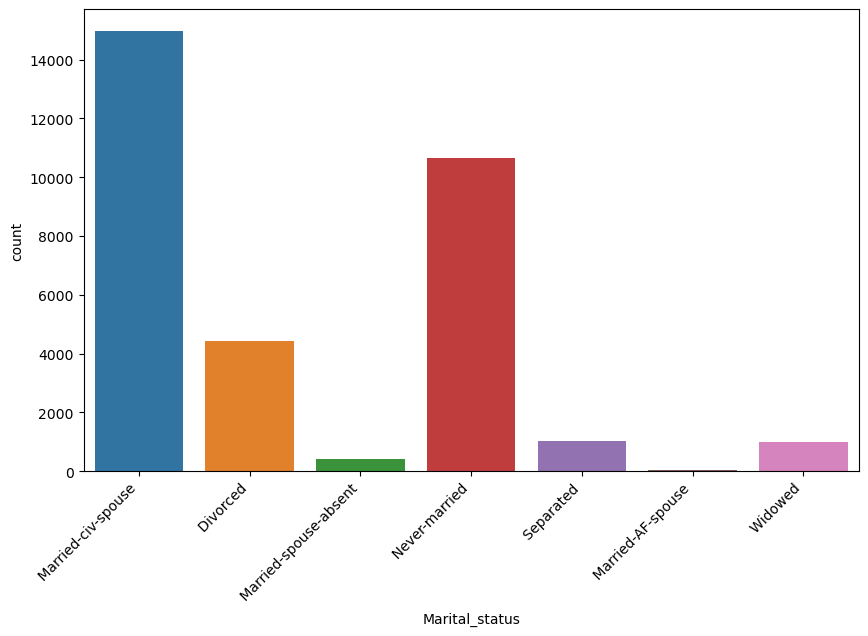

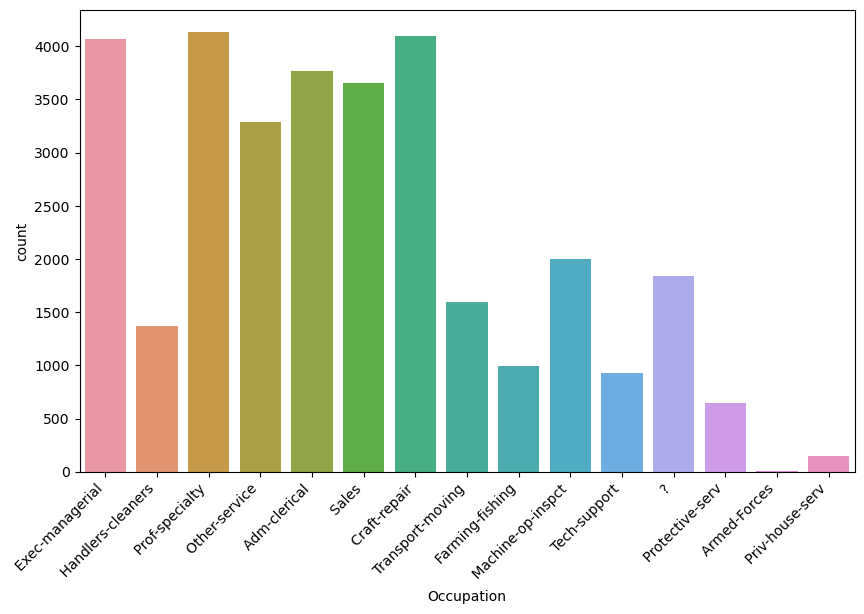

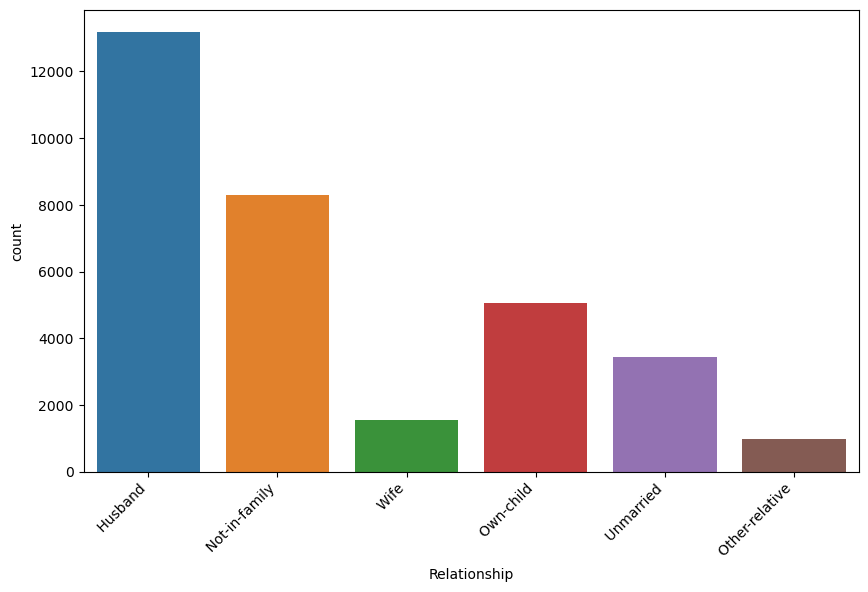

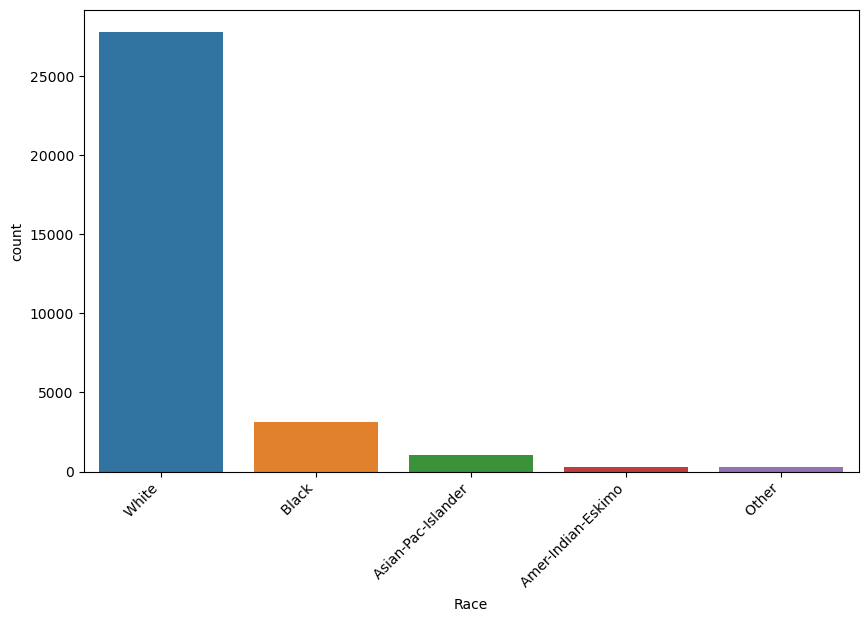

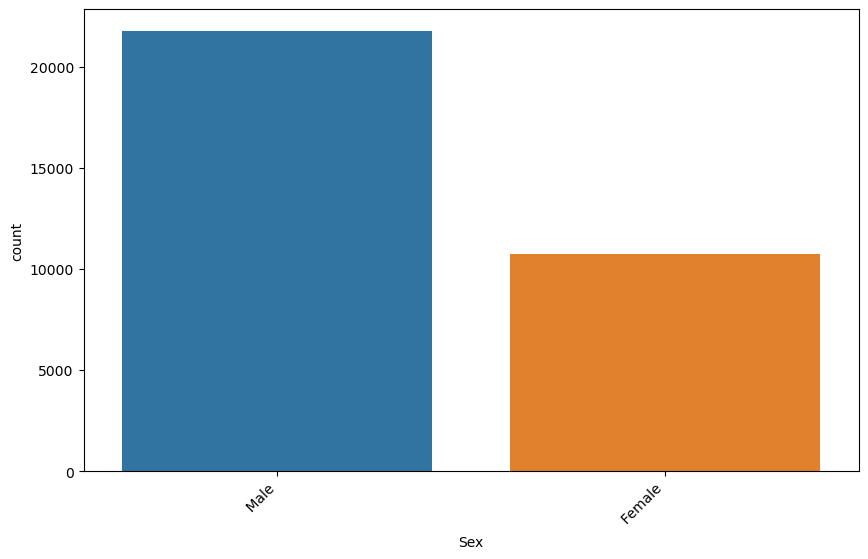

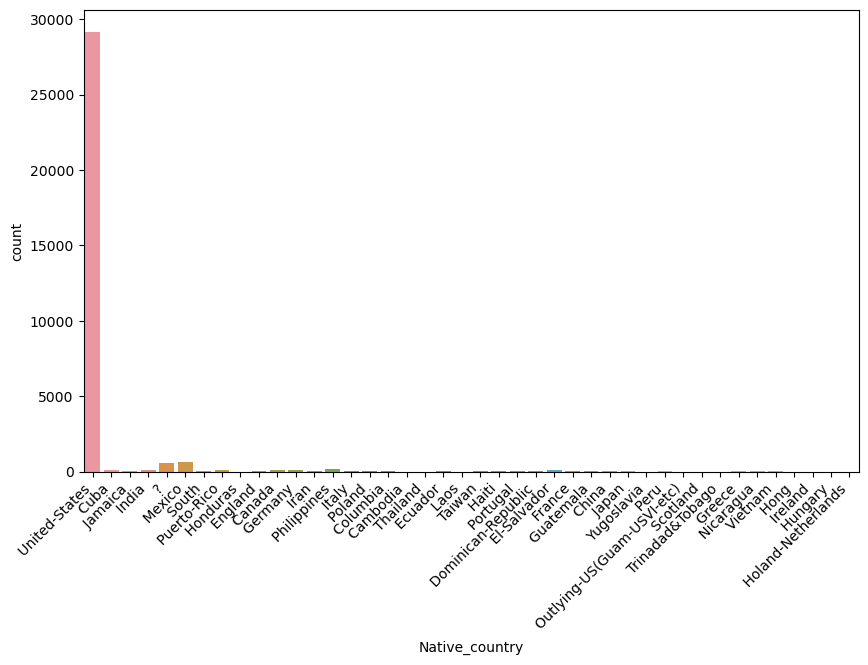

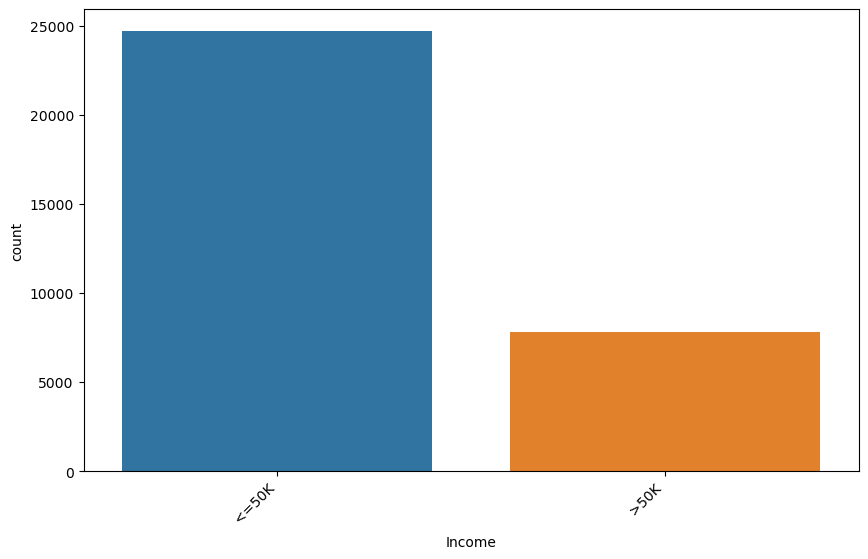

In [19]:
# Bar plots for categorical columns
for column in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, data=df)
    plt.xticks(rotation=45, ha='right')
    plt.show()


Observations

. Wrokclass that is Private , suggests that a significant proportion of the individuals in the dataset belong to the 'Private' workclass.

. In Education HS-grad and Some-college has higher proportion in the dataset.

. Data for Married-spouse and Never-married people is more compared to the other Marital_status.

. Dataset has data more of White people other than any race.

. More data of Male gender is there compared to female.

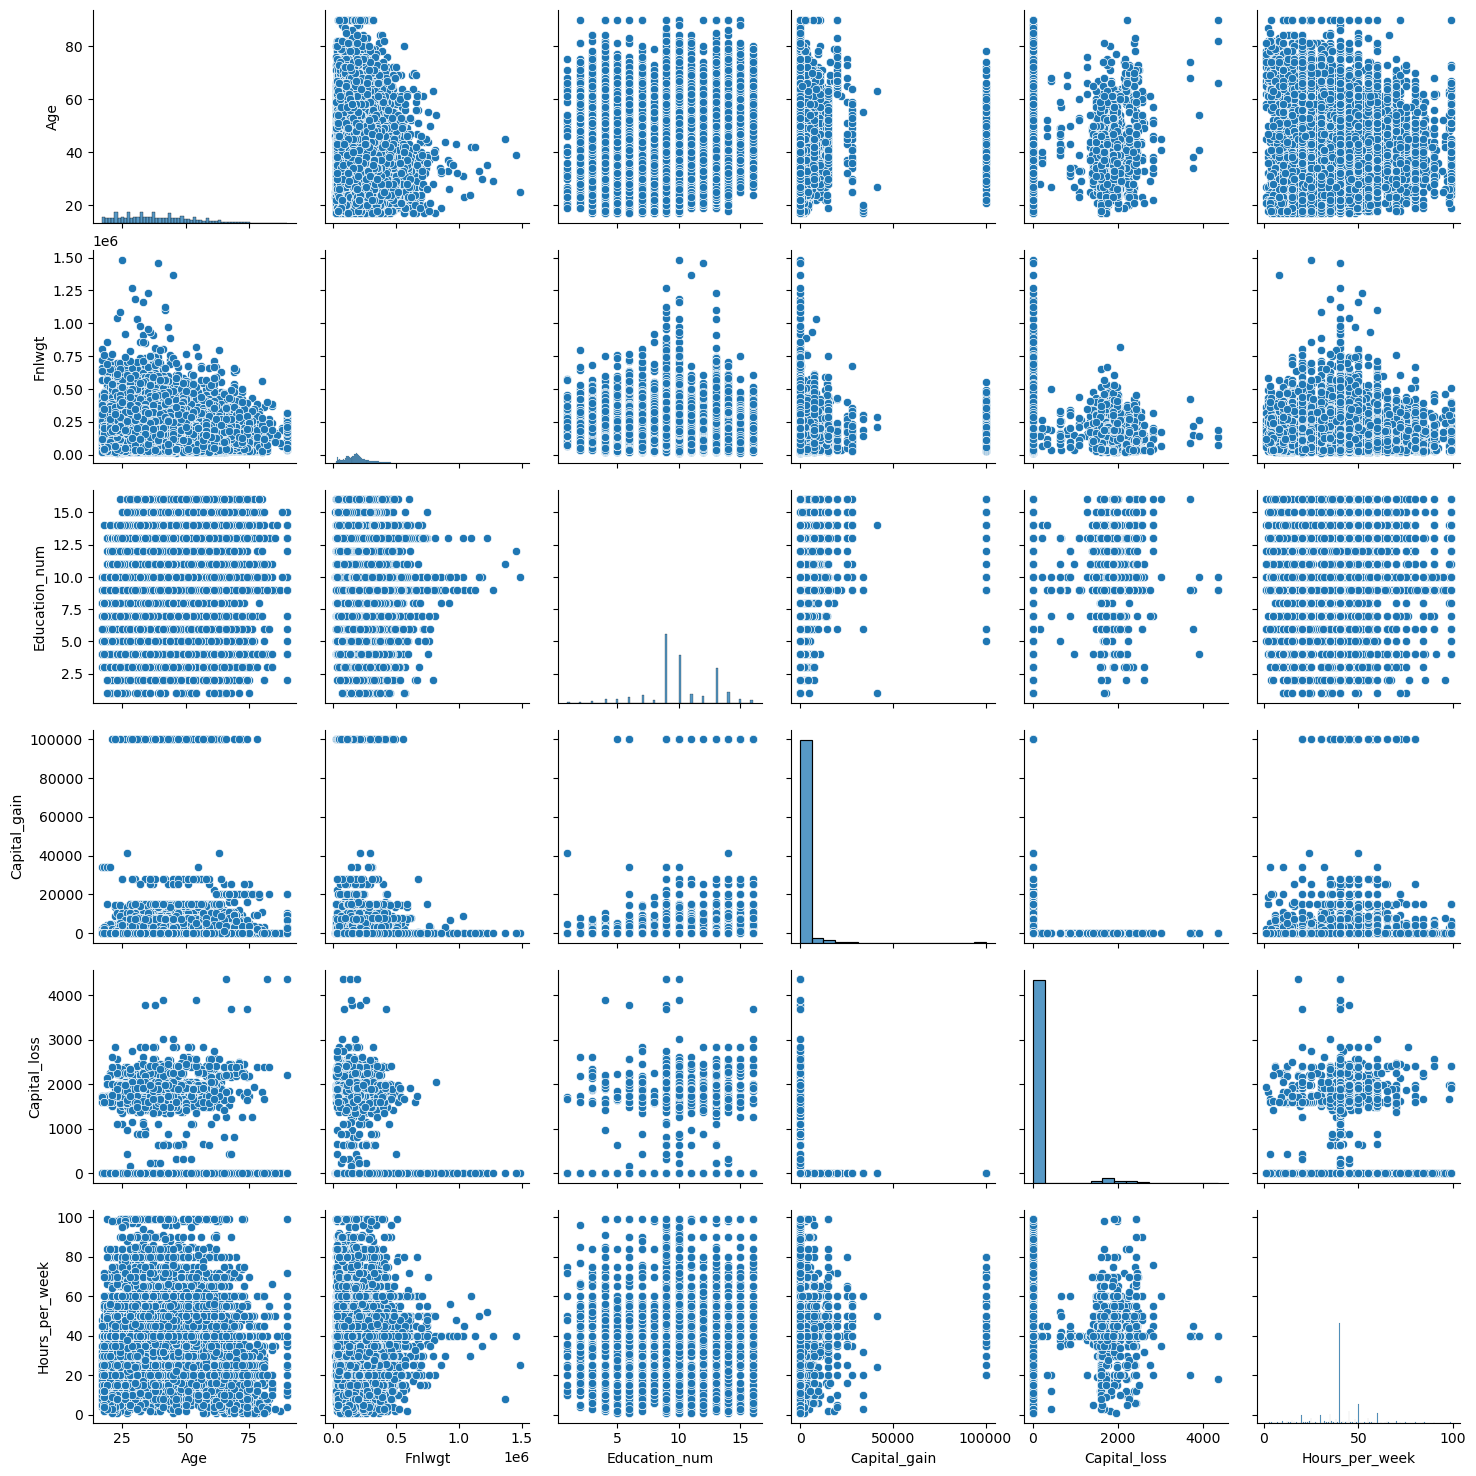

In [21]:
# Scatter plots for numeric variables
sns.pairplot(df, vars=df.select_dtypes(exclude=['object']).columns)
plt.show()

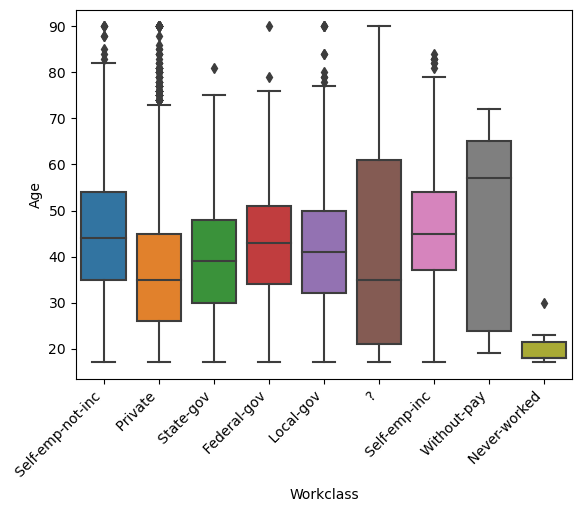

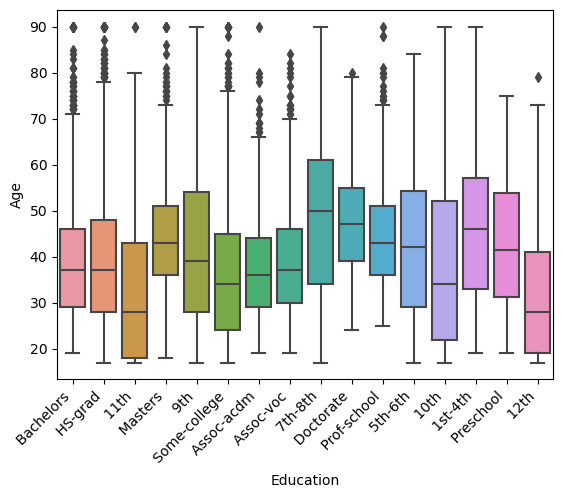

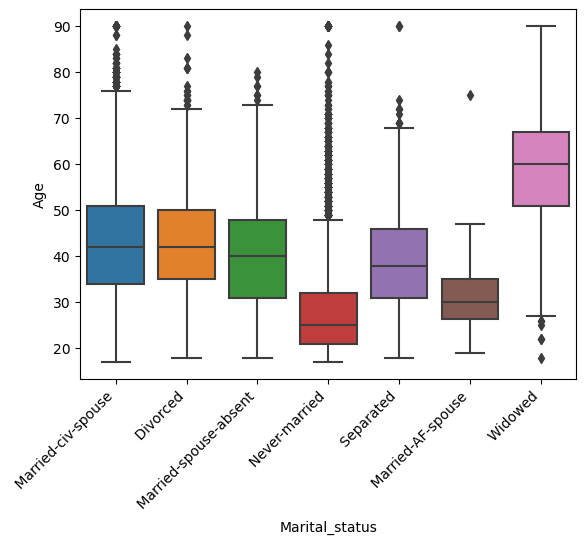

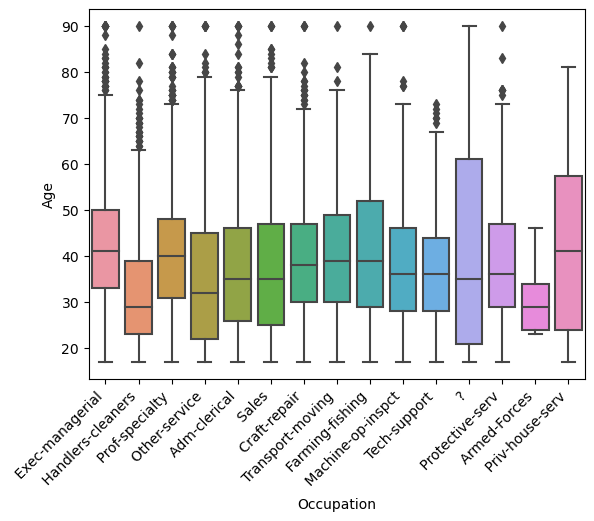

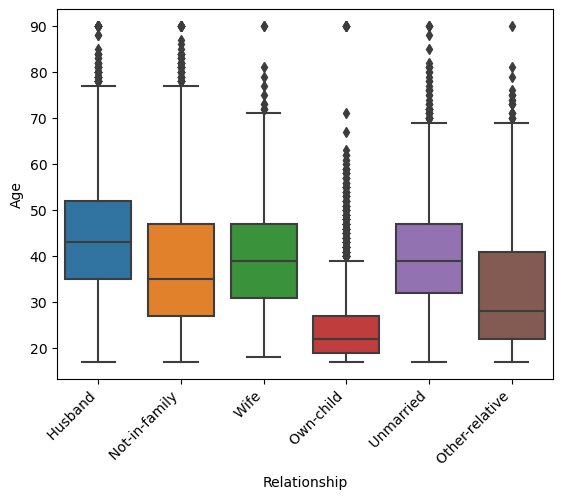

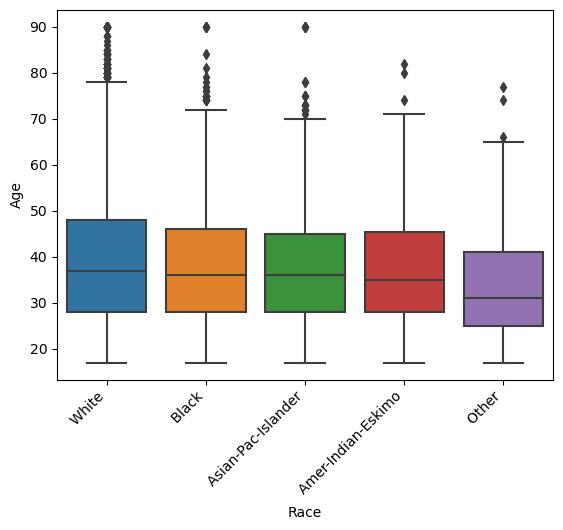

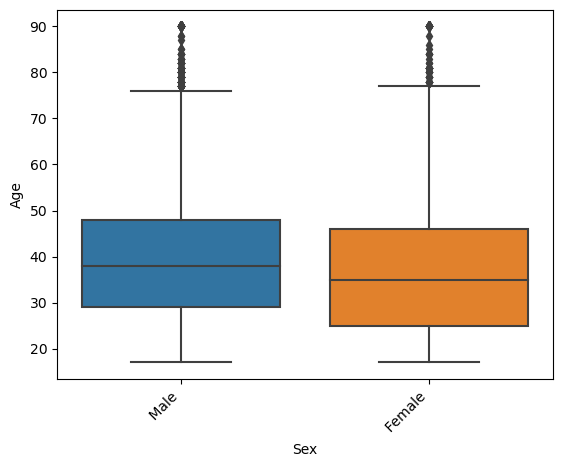

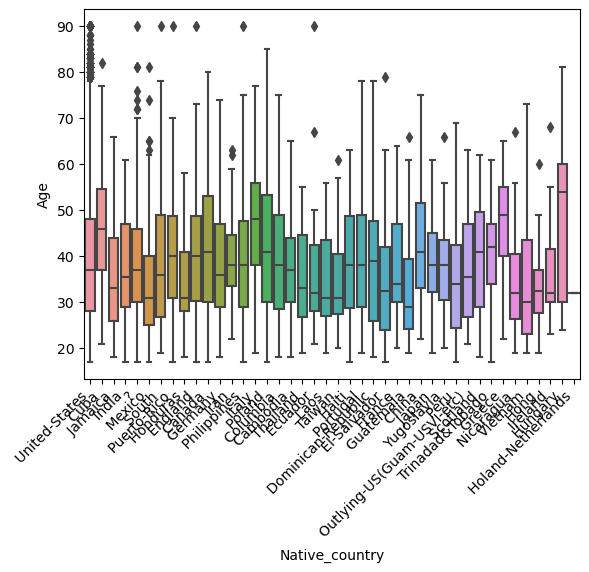

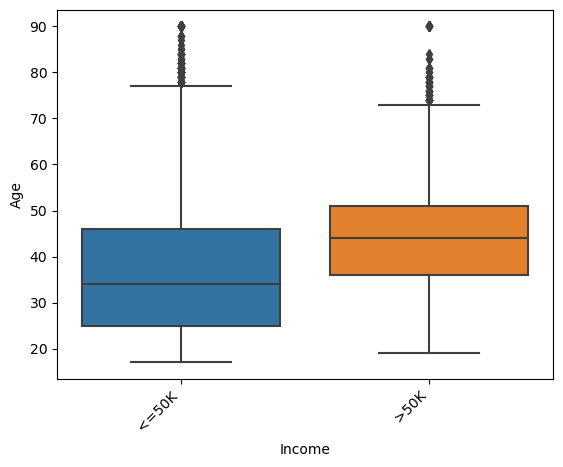

In [23]:
# Box plots for numeric vs. categorical variables
for column in df.select_dtypes(include=['object']).columns:
    sns.boxplot(x=column, y='Age', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.show()


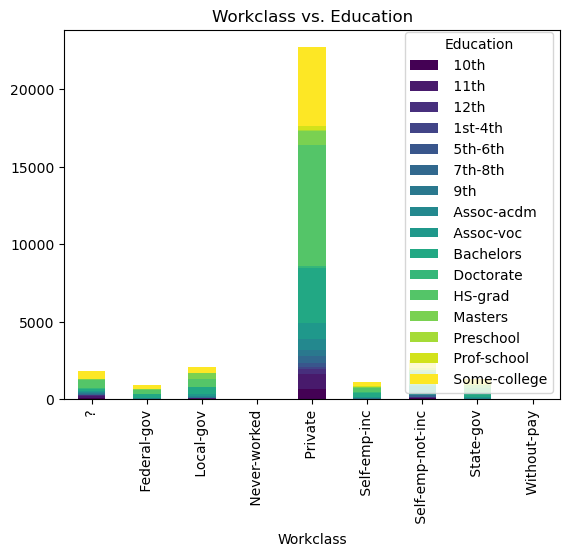

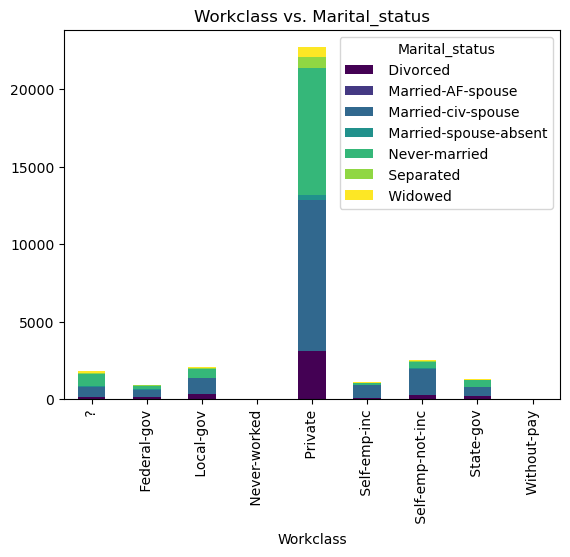

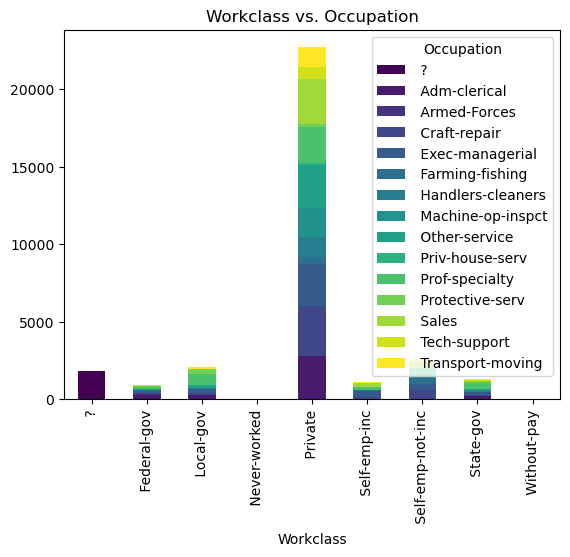

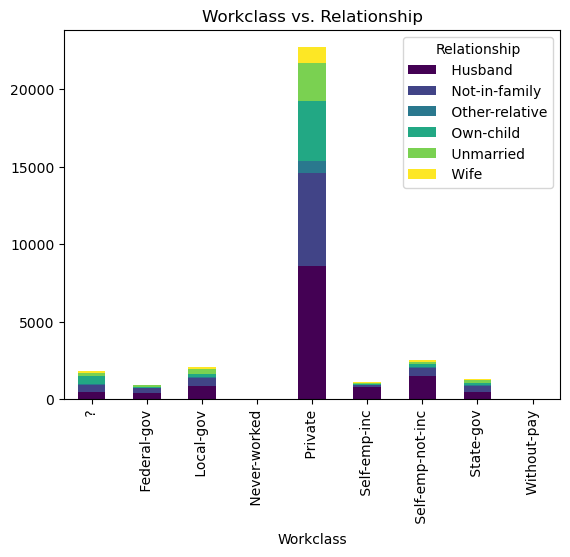

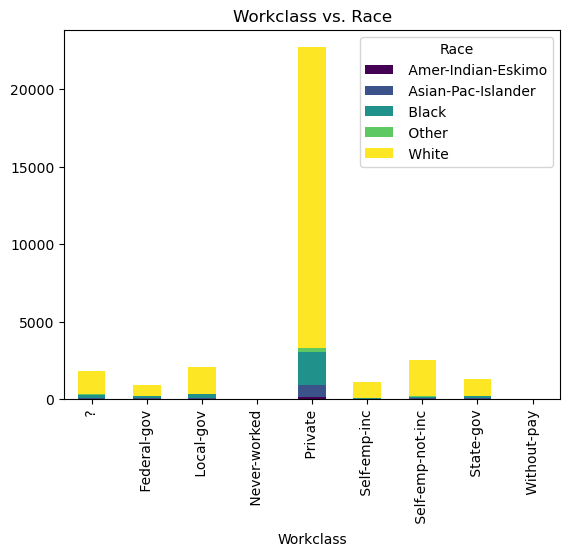

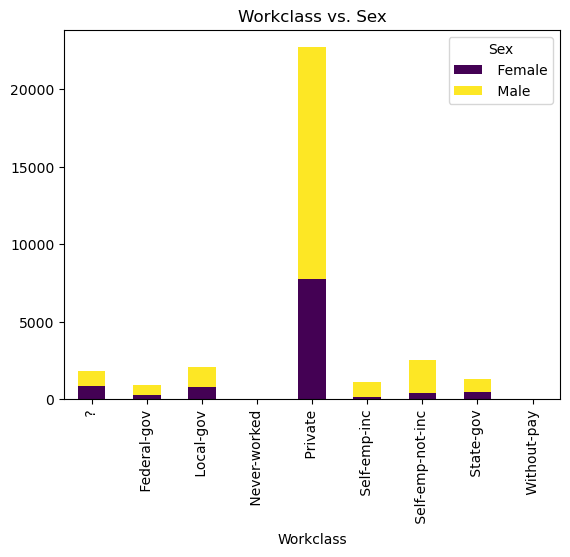

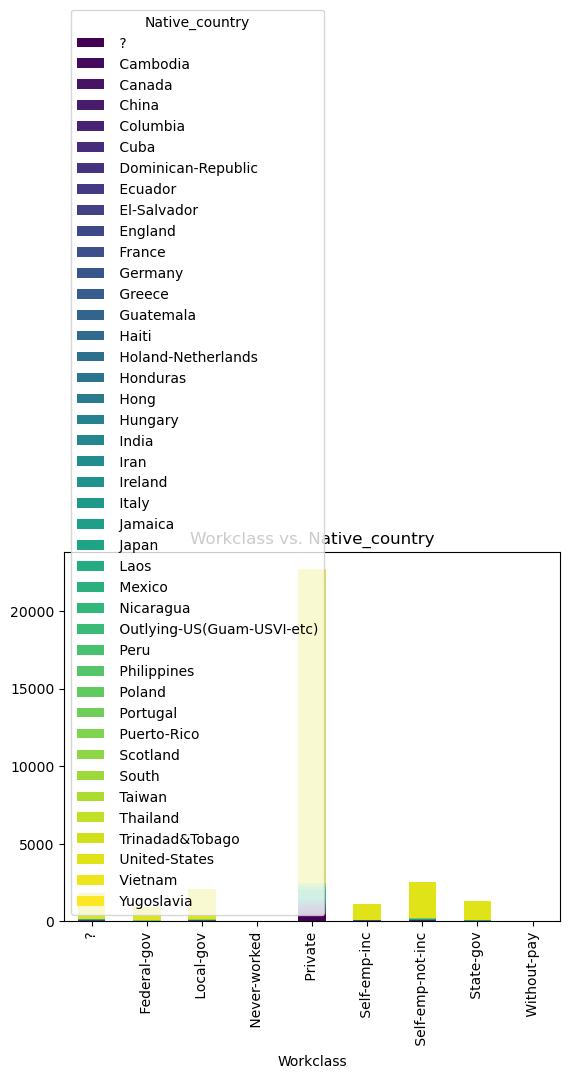

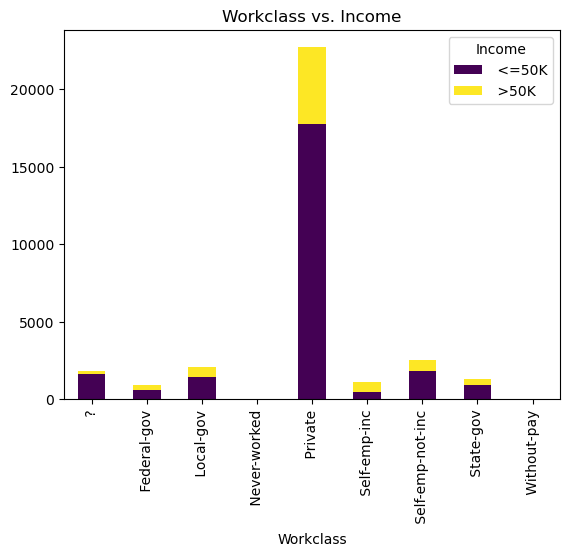

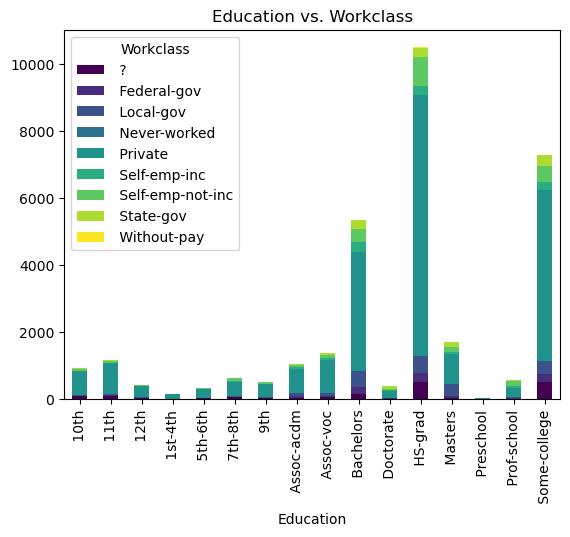

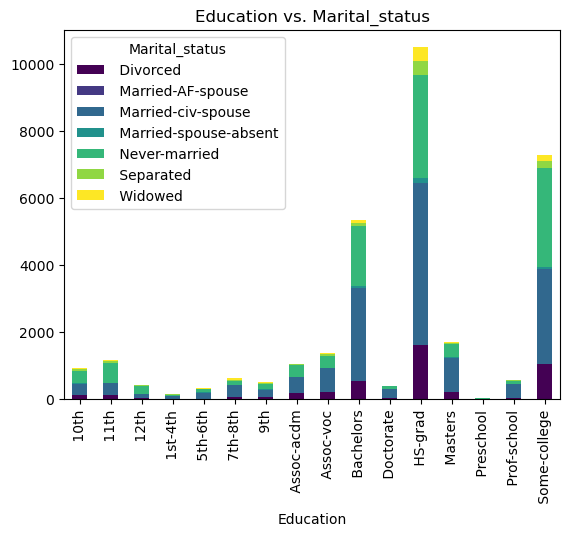

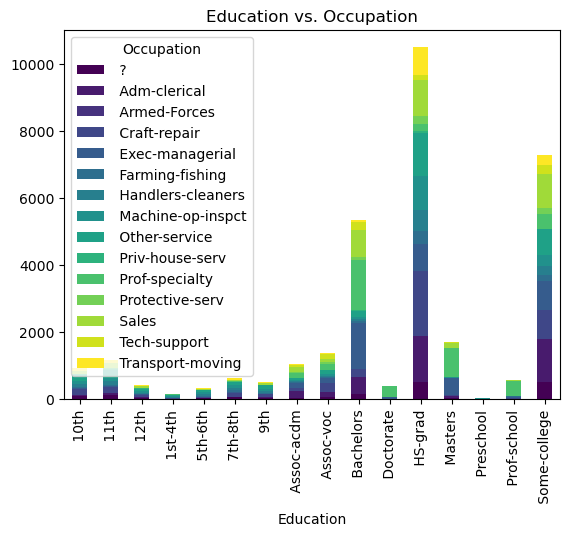

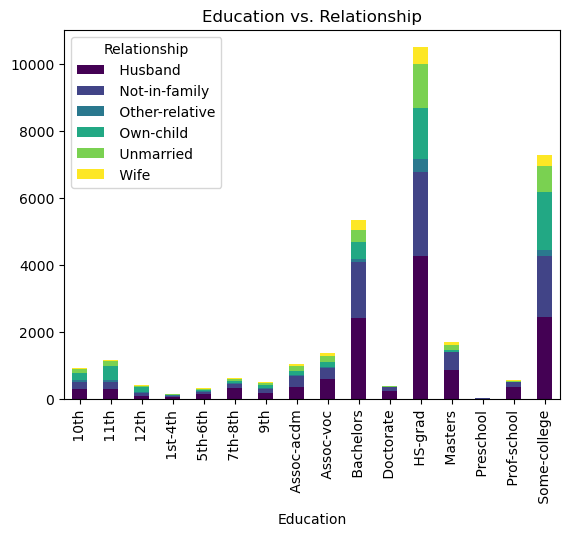

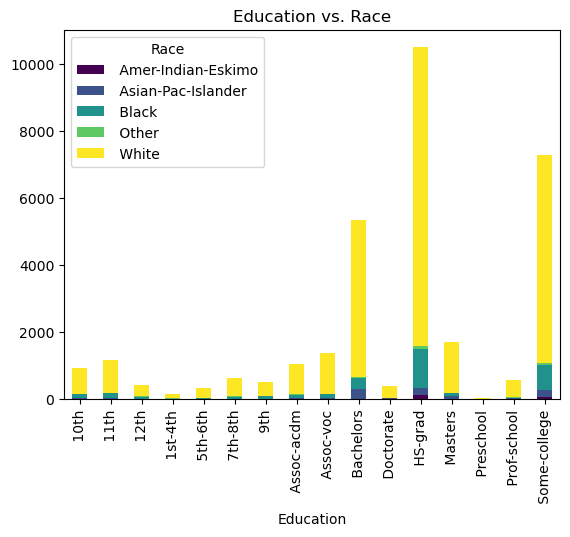

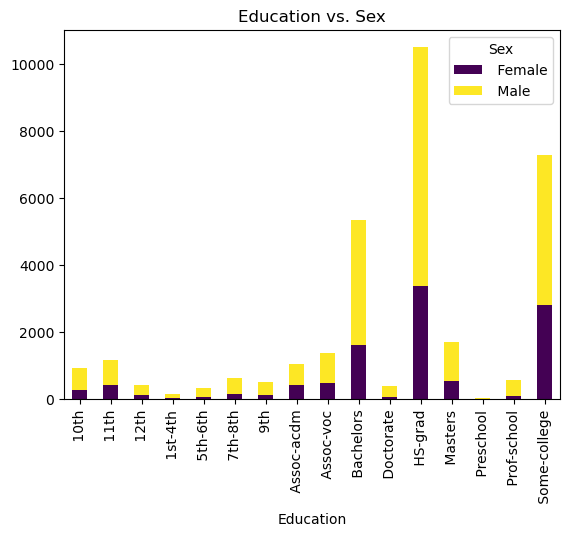

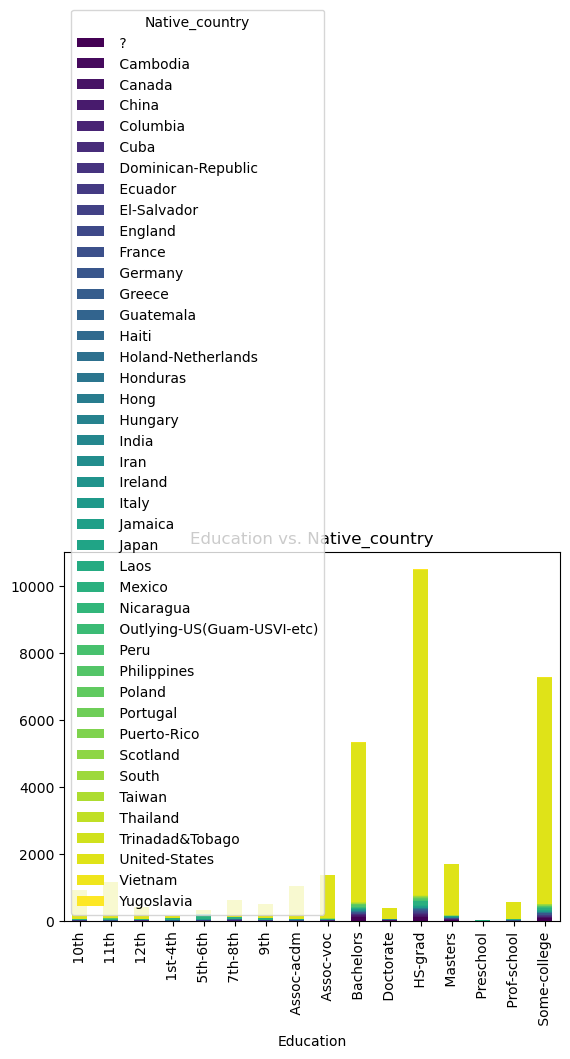

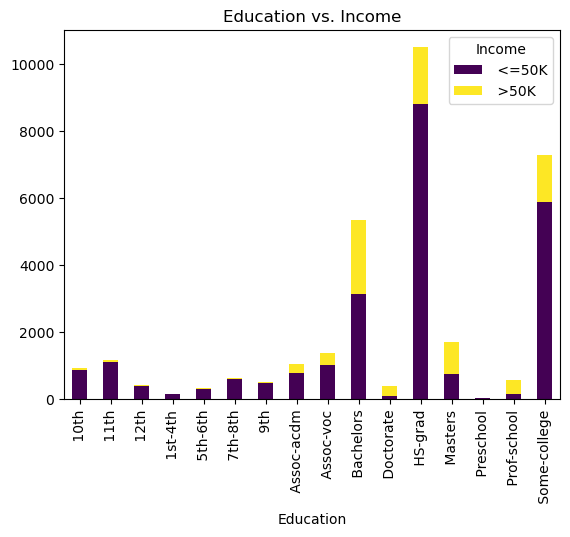

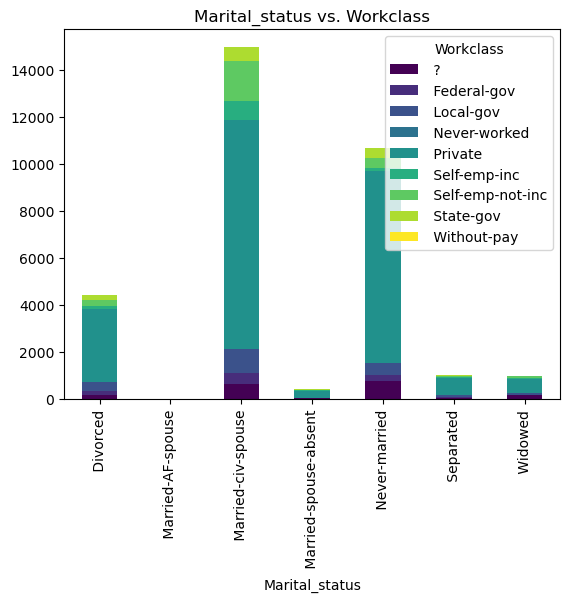

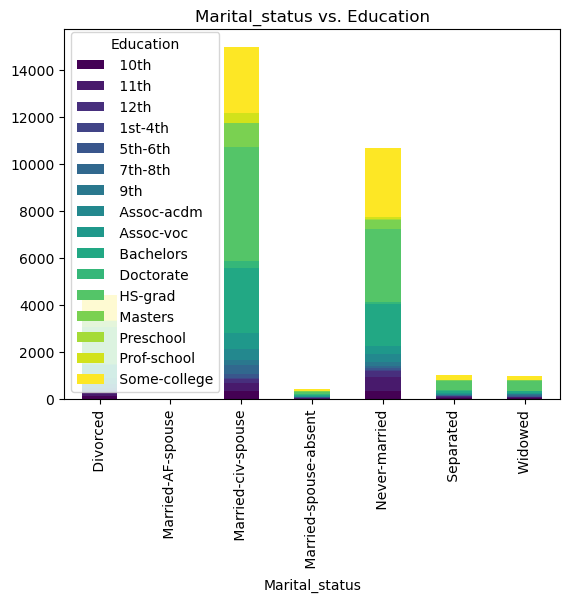

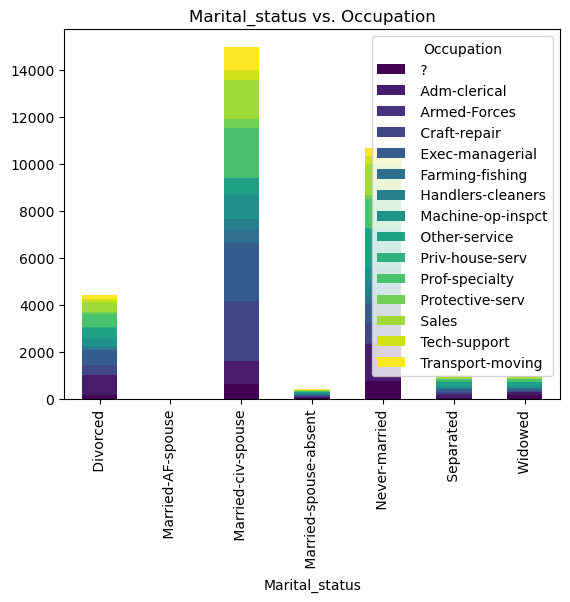

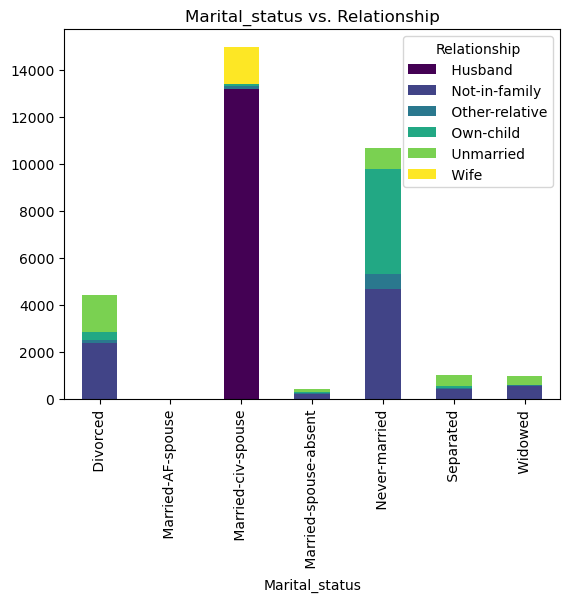

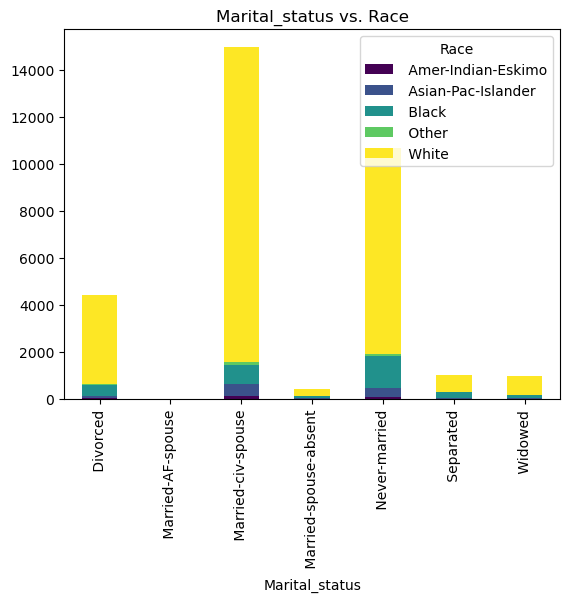

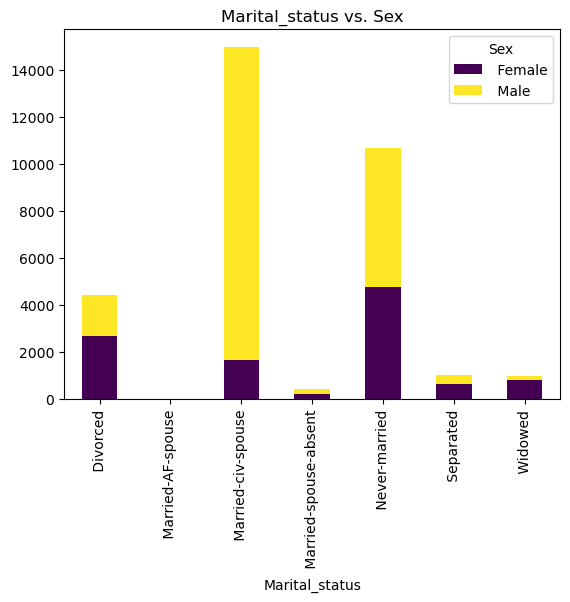

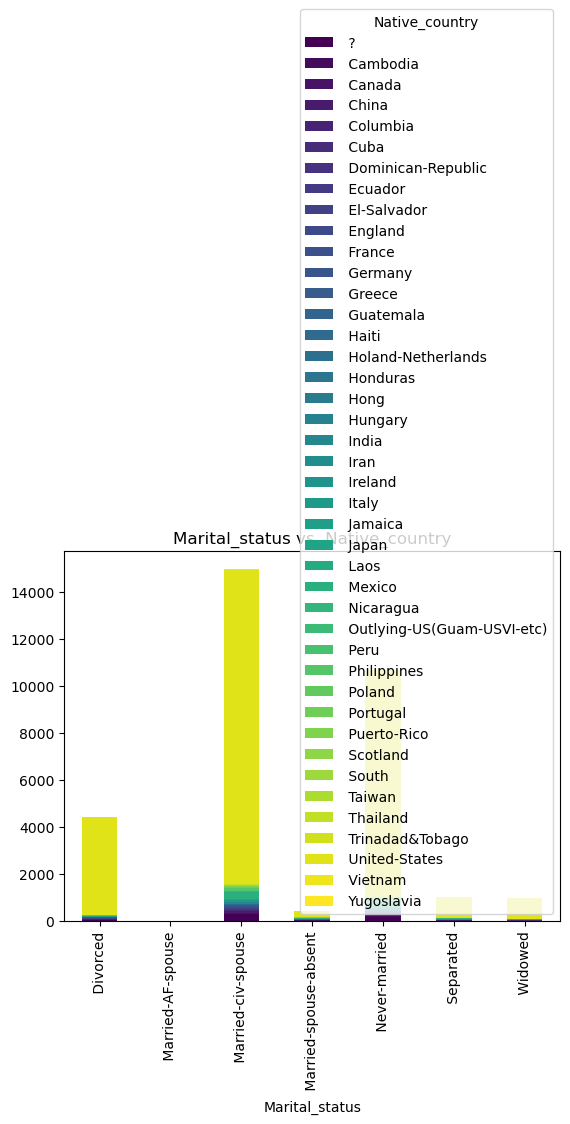

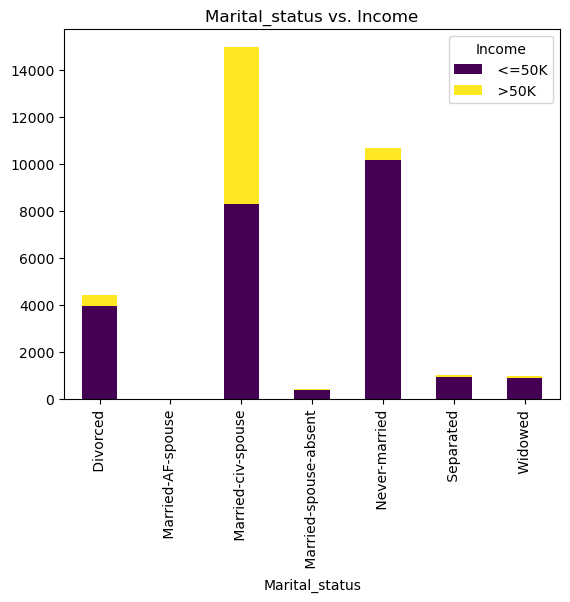

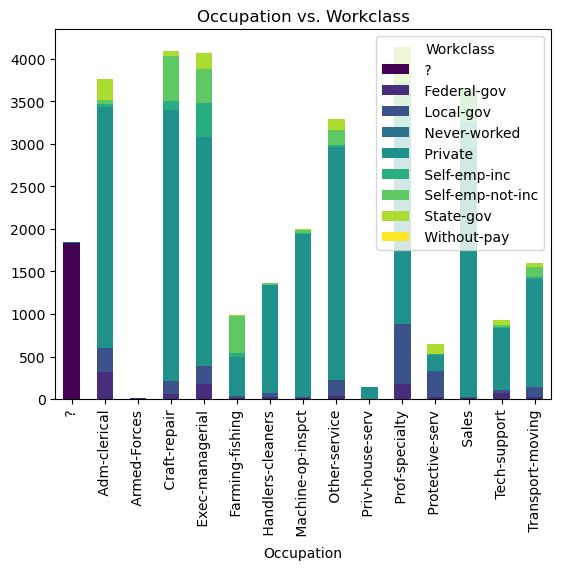

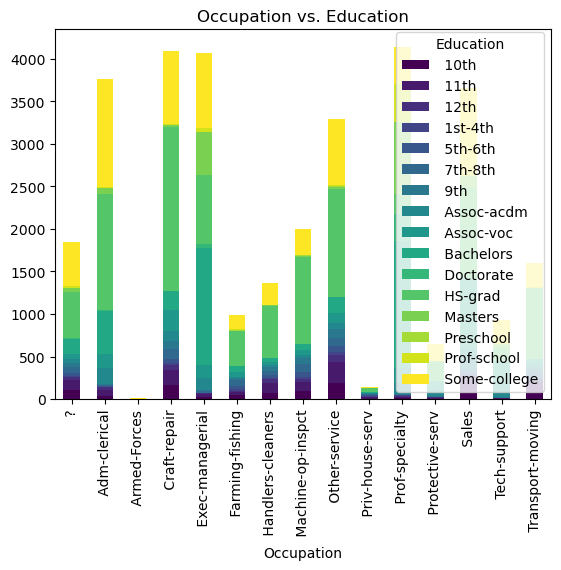

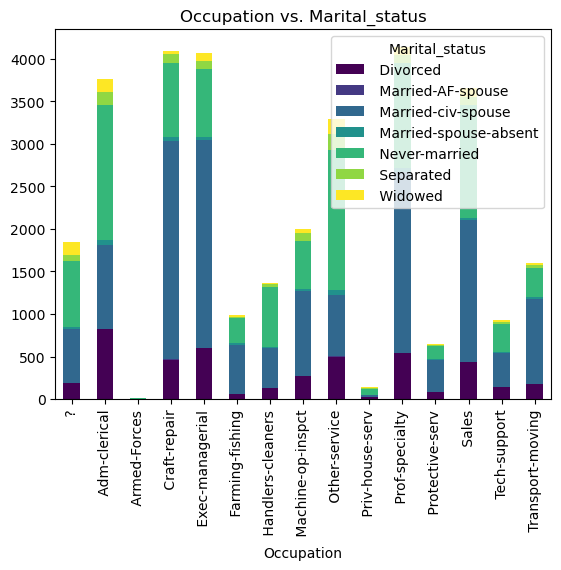

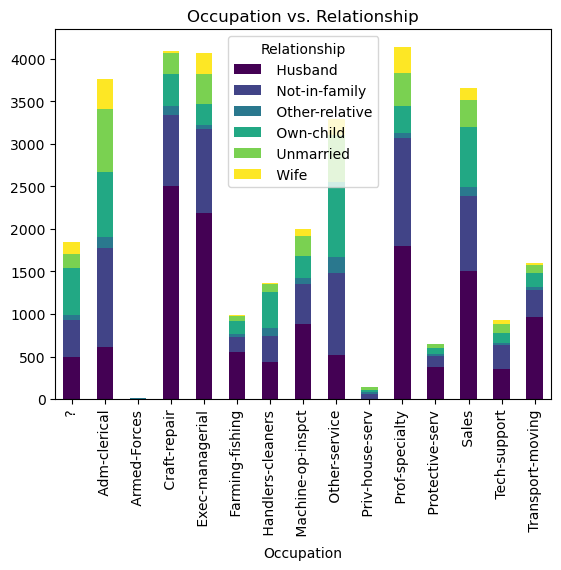

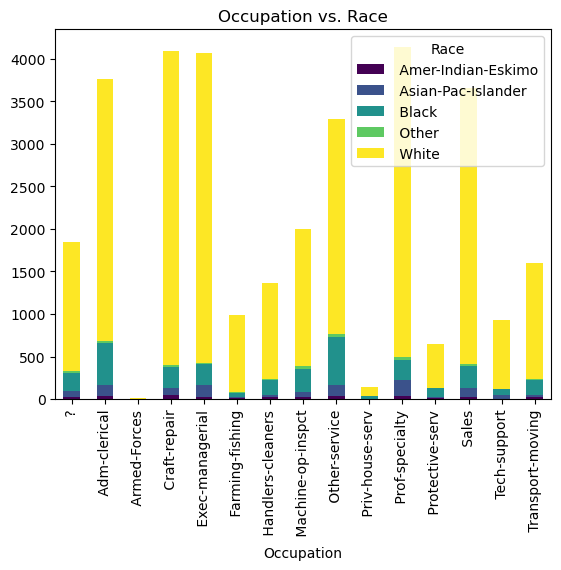

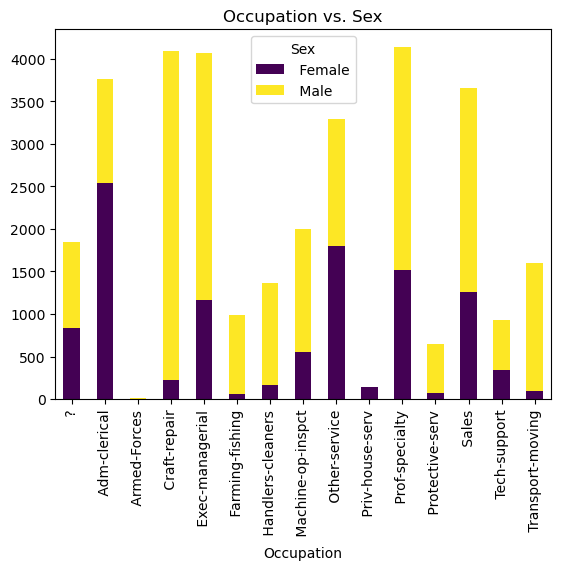

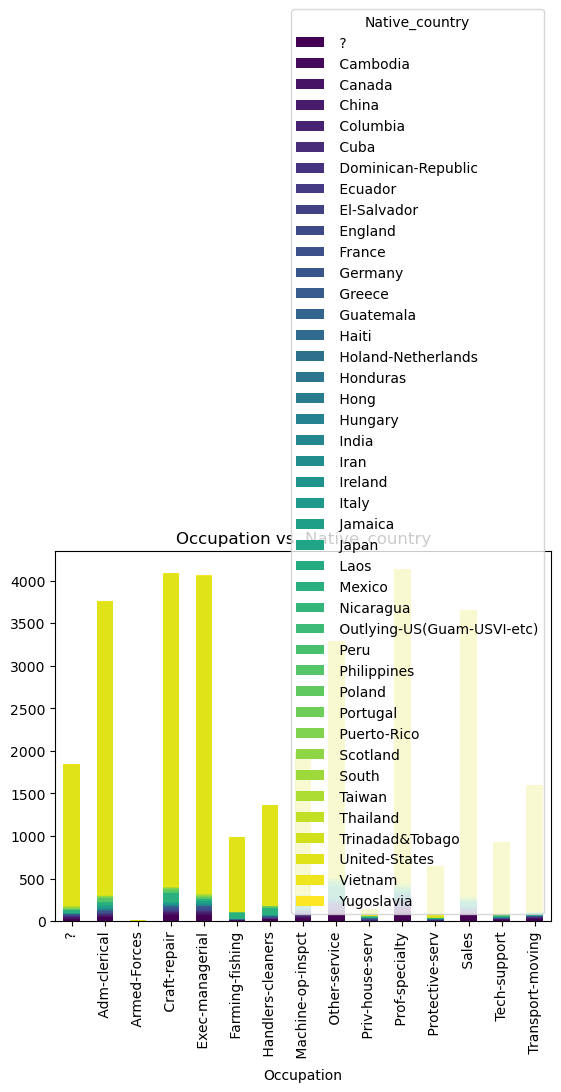

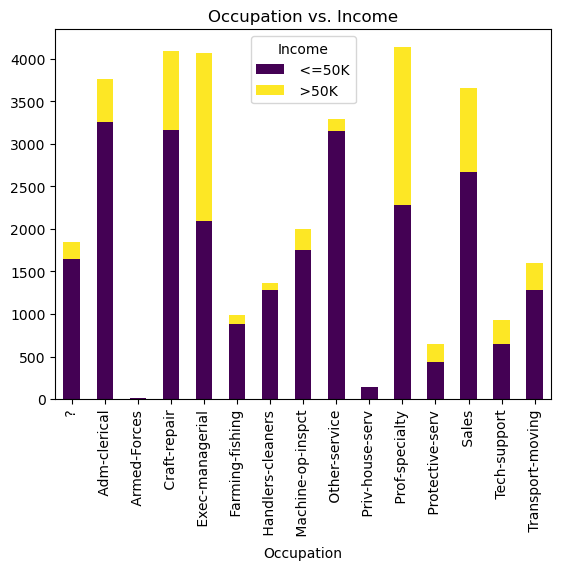

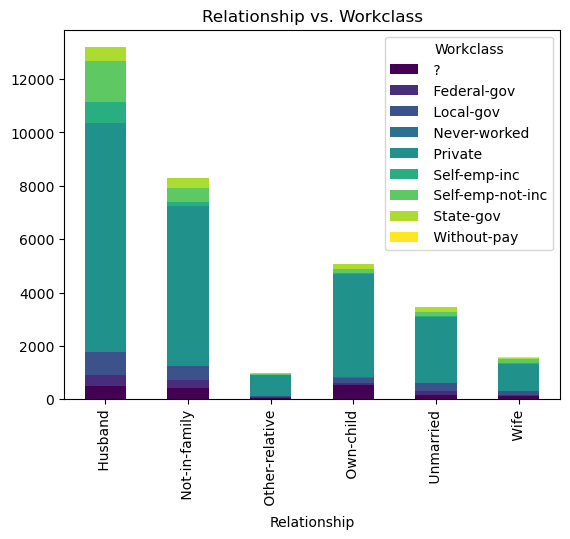

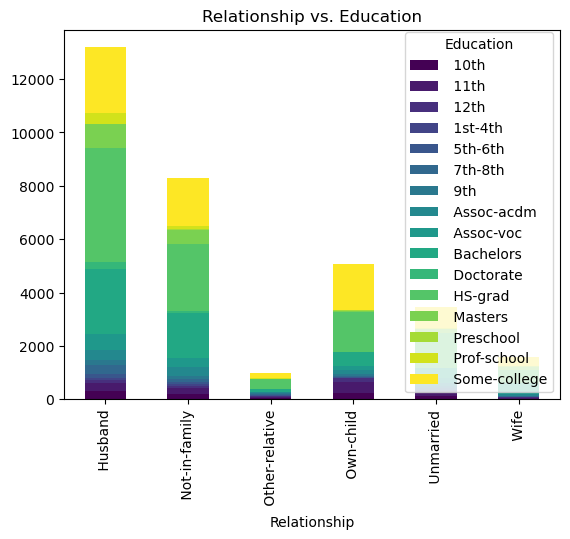

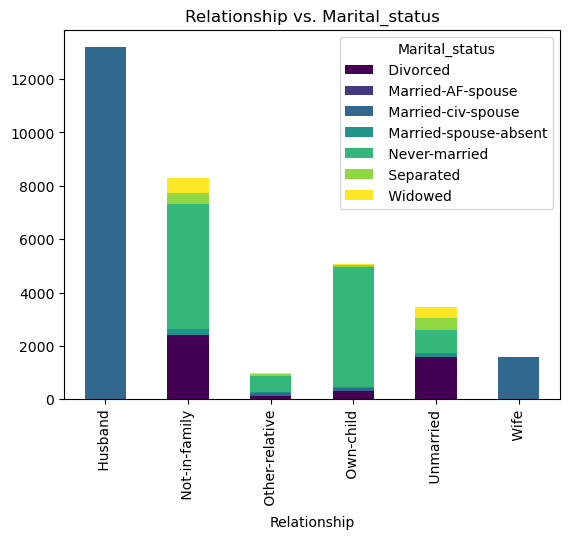

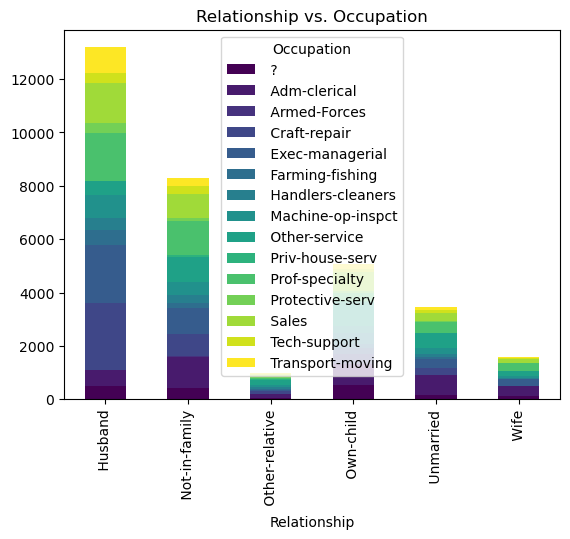

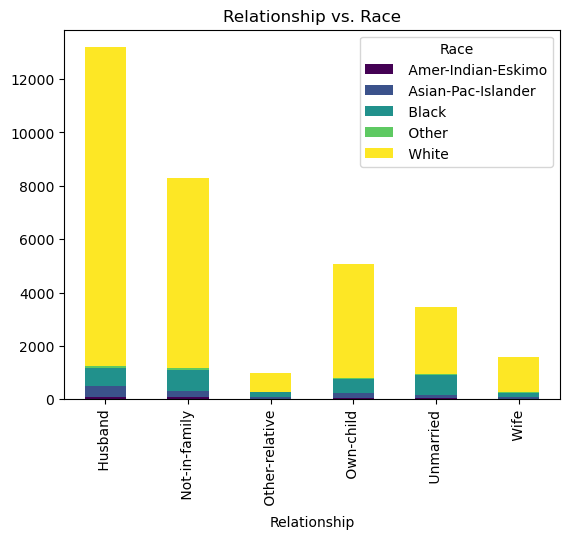

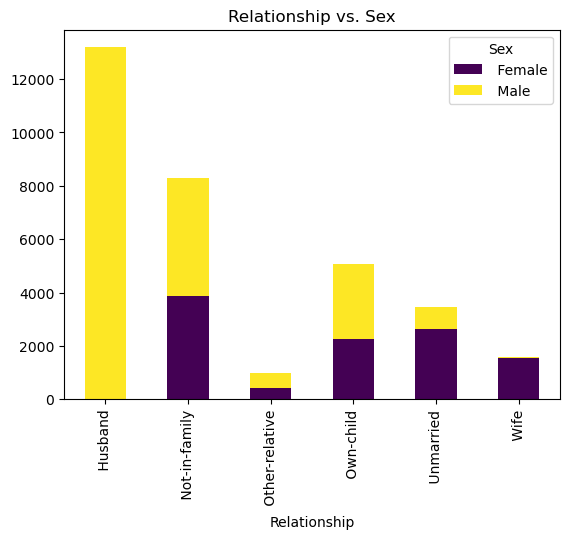

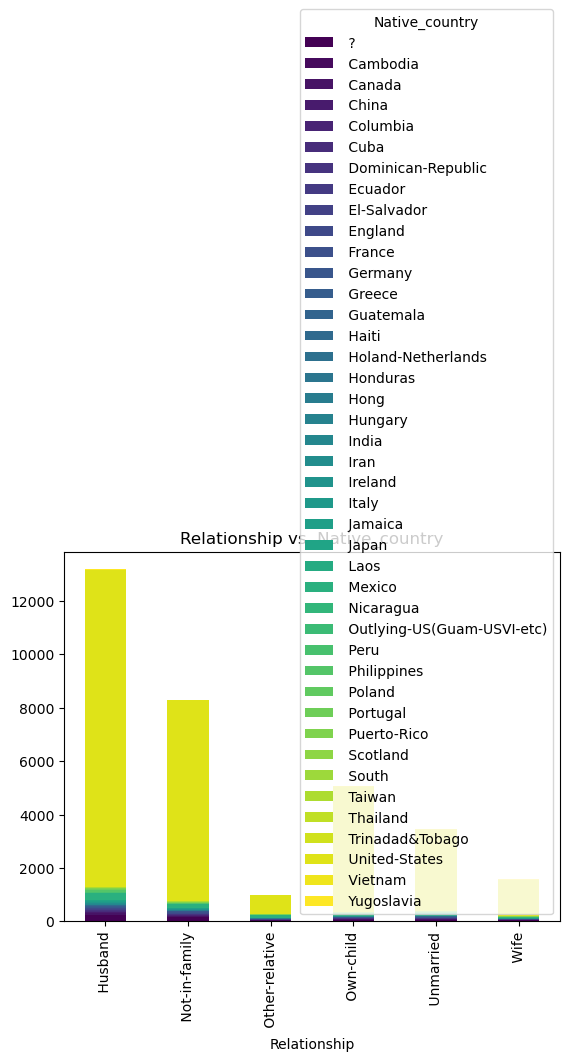

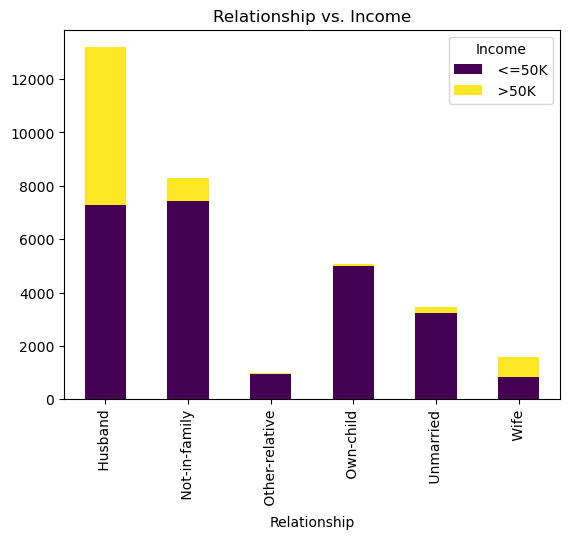

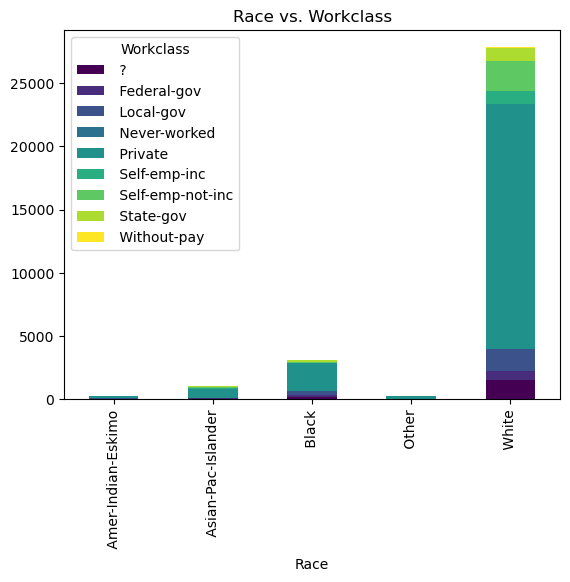

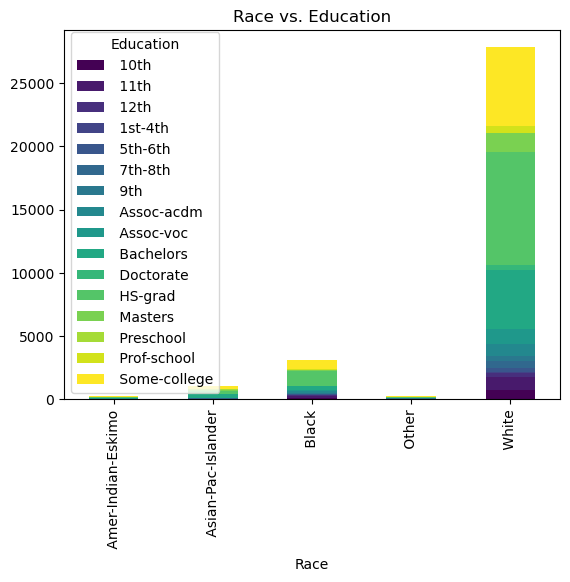

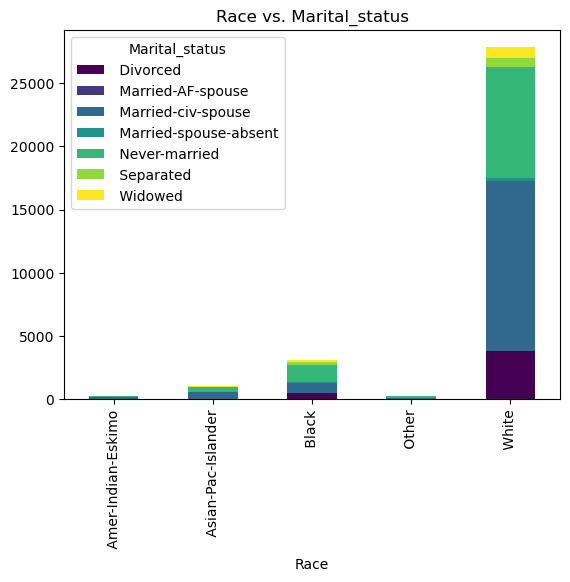

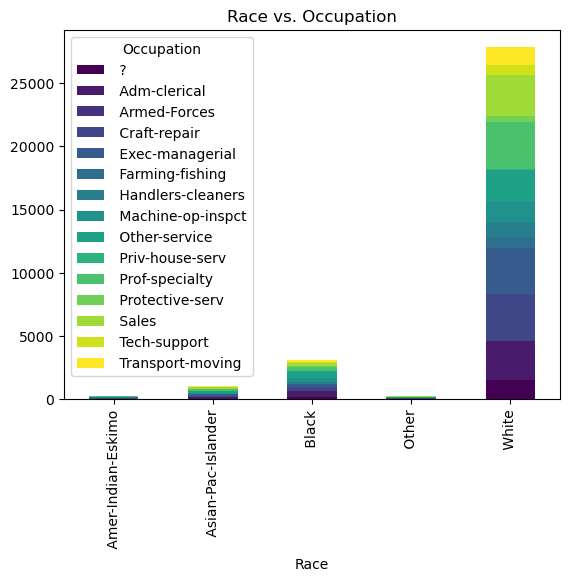

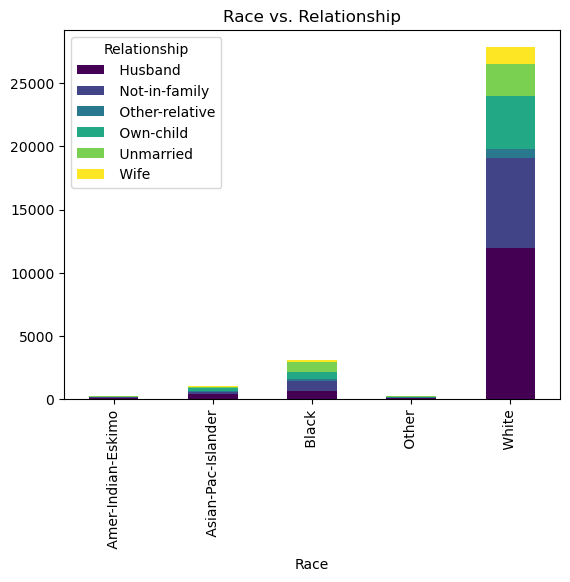

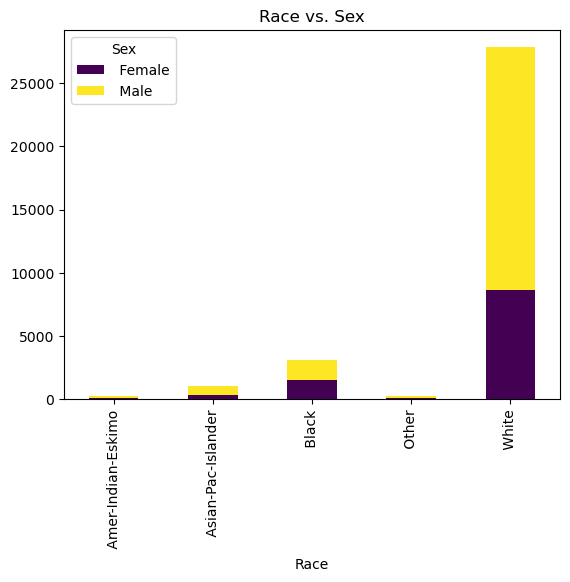

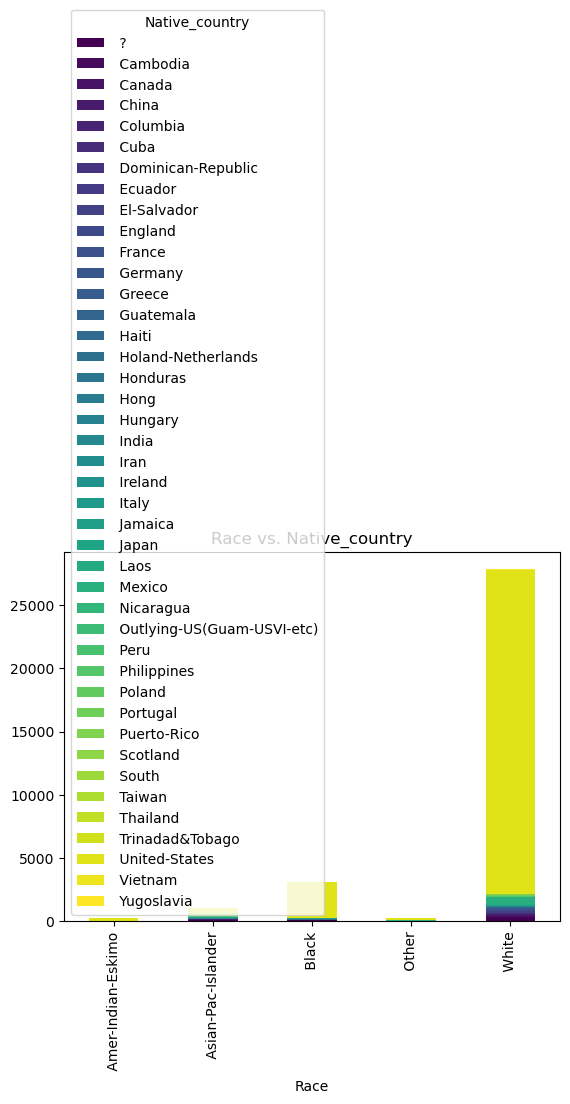

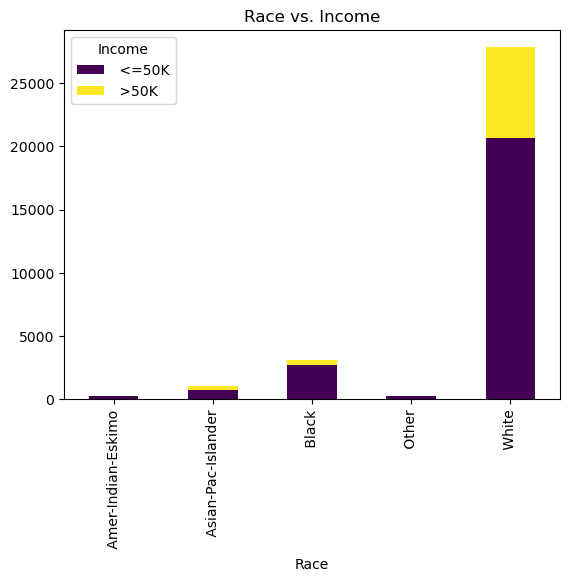

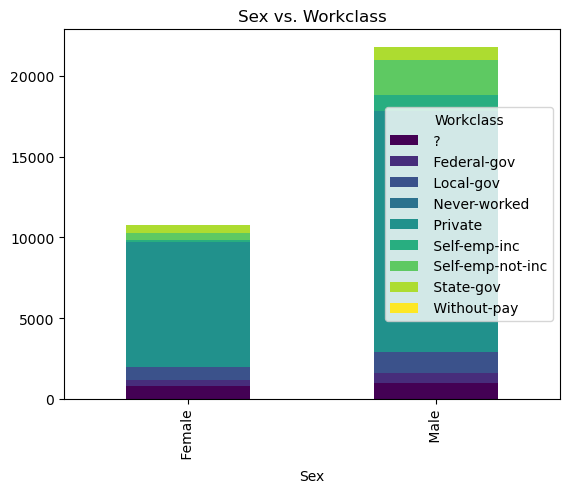

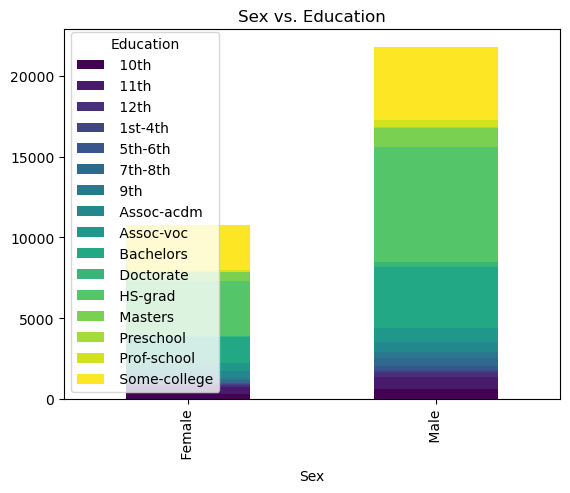

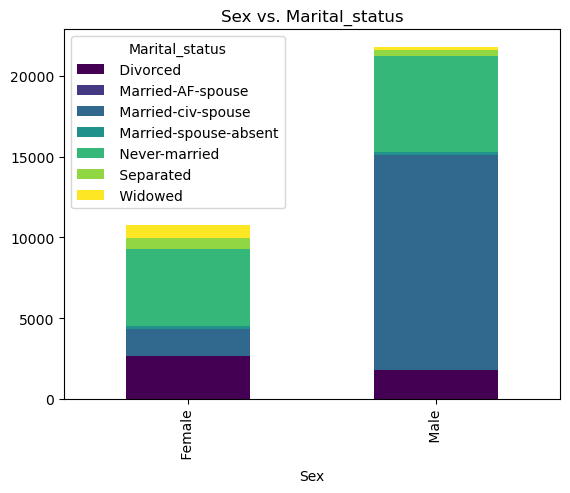

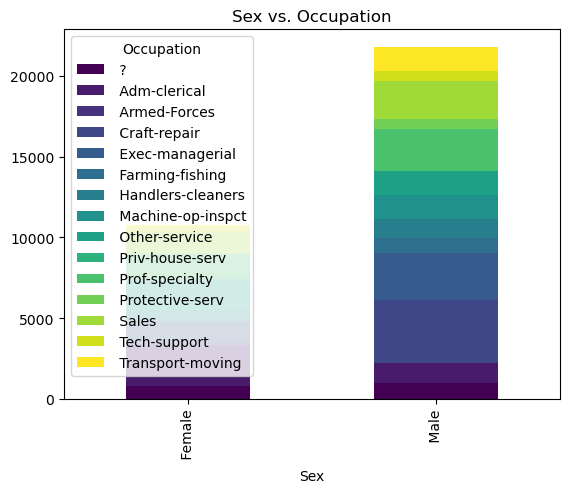

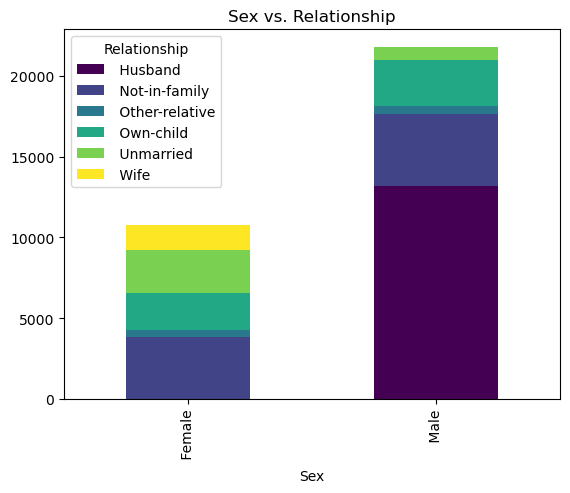

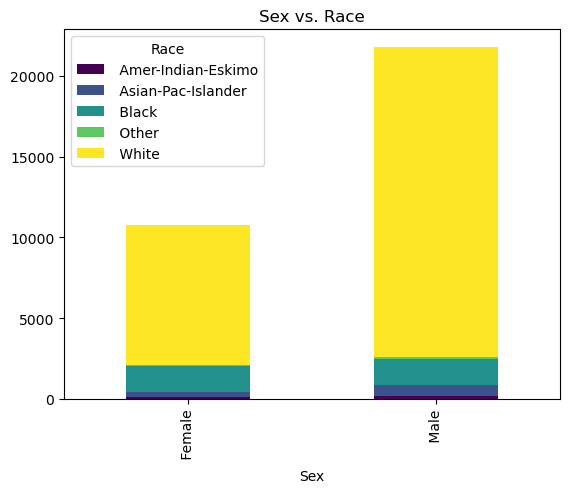

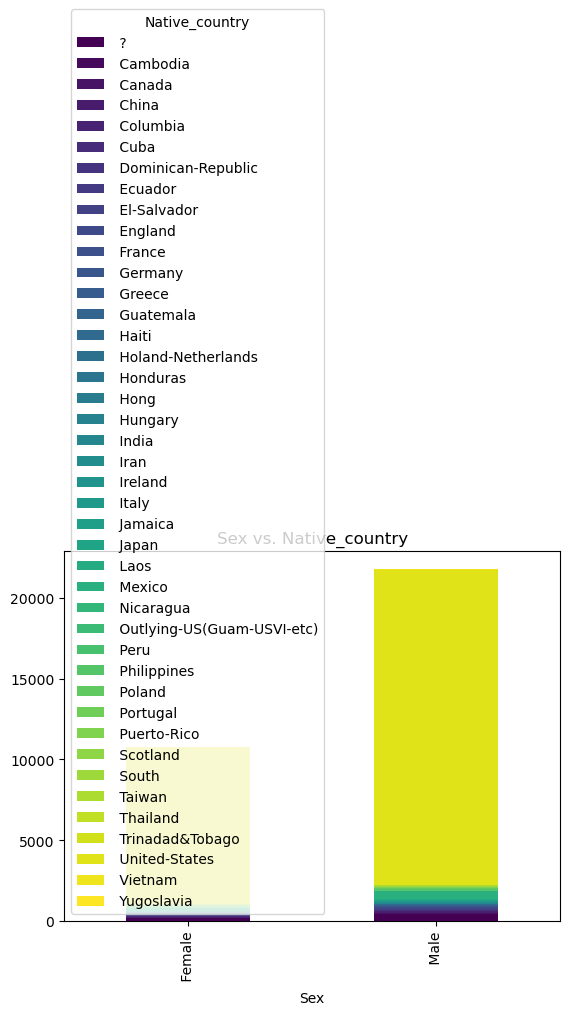

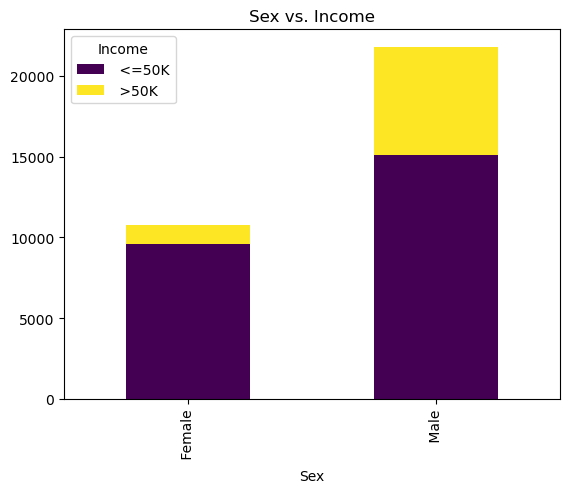

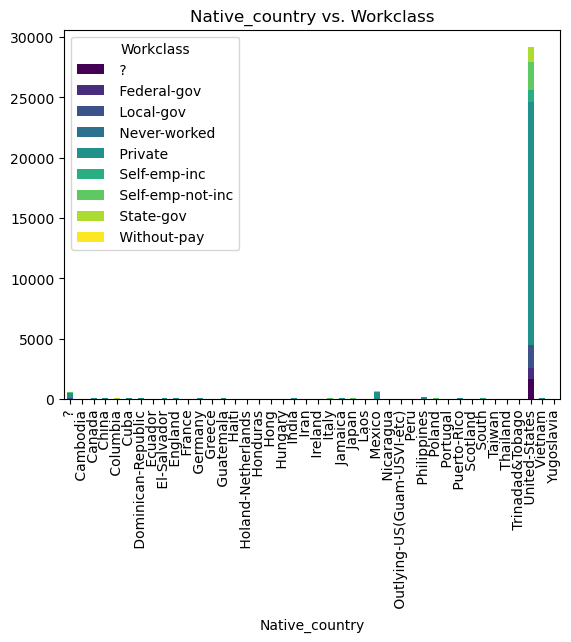

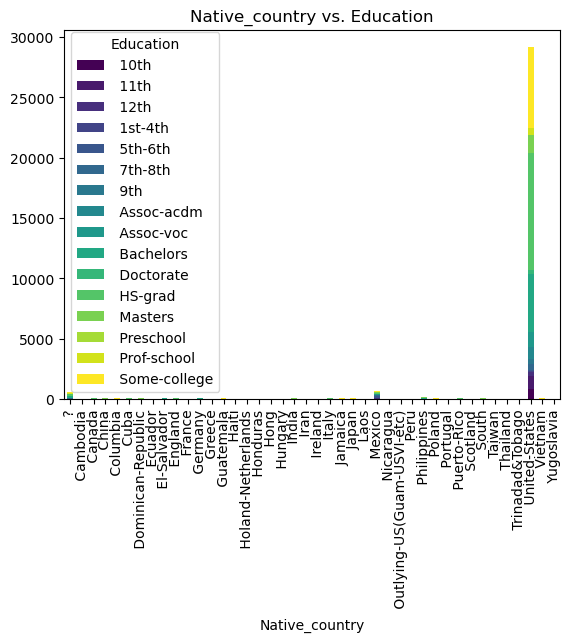

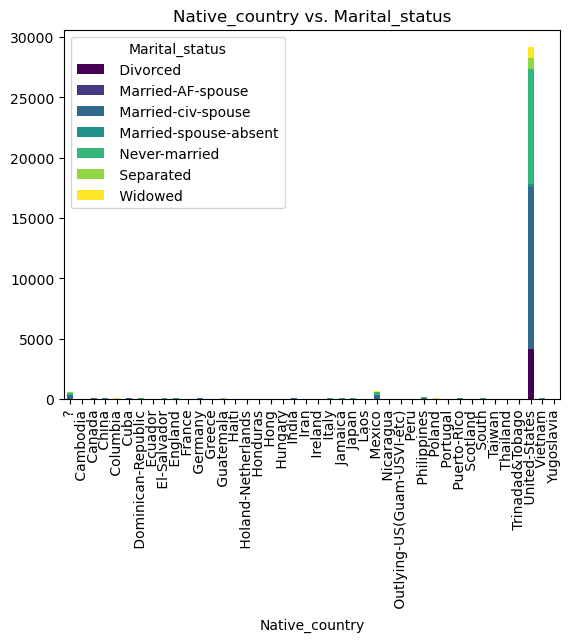

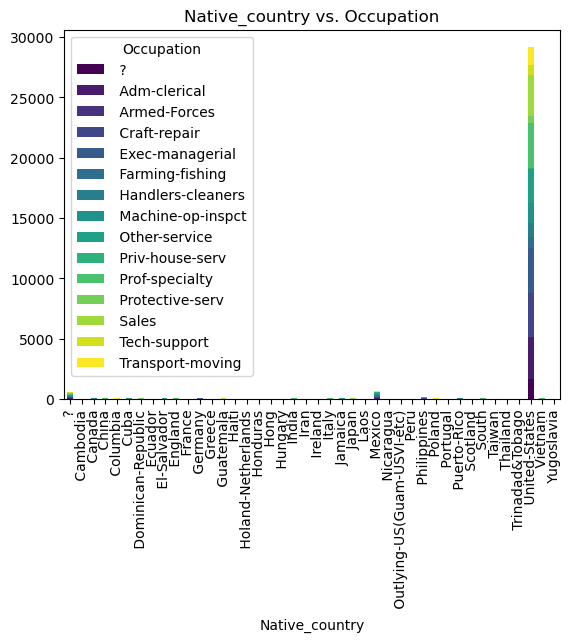

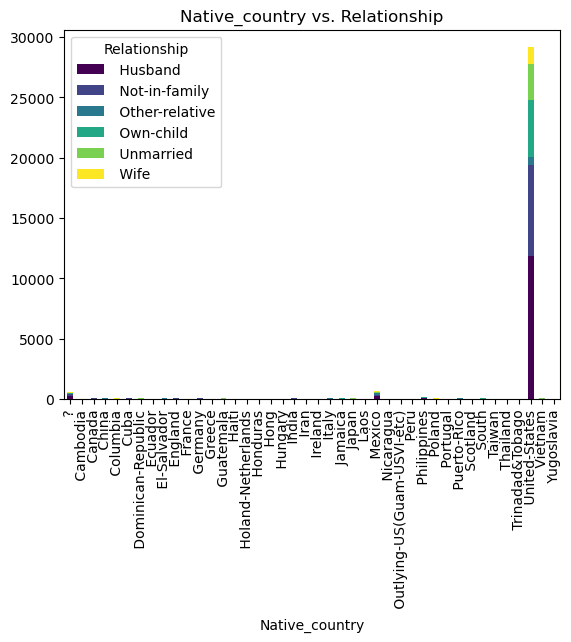

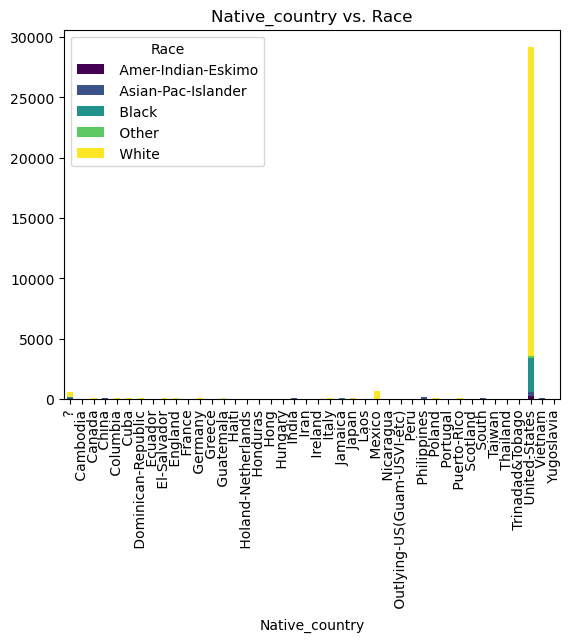

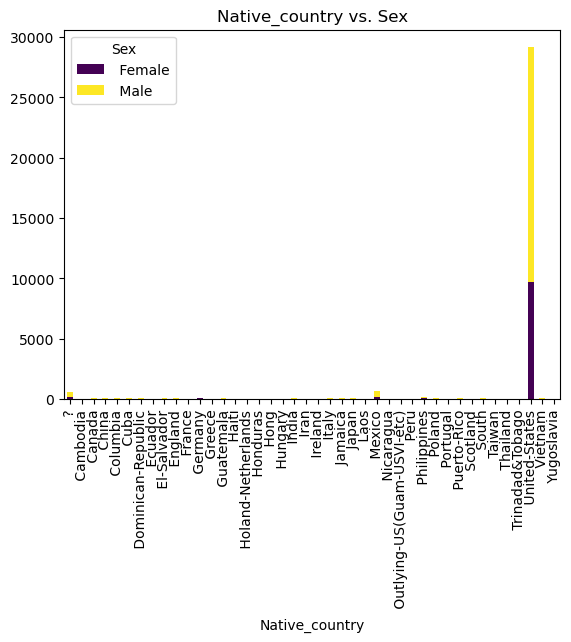

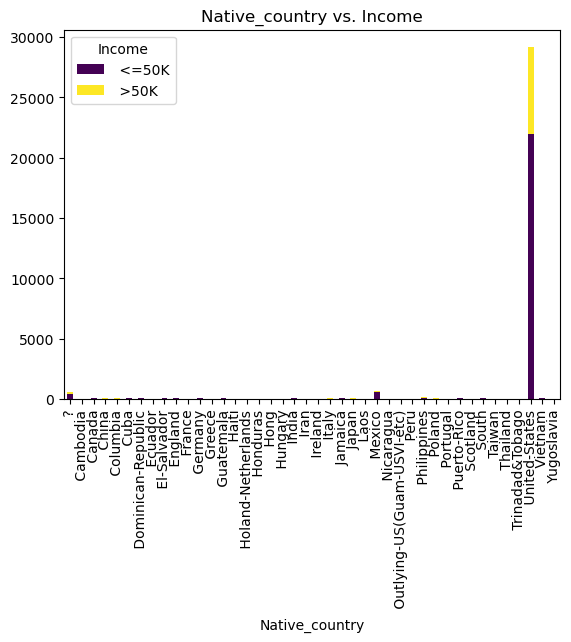

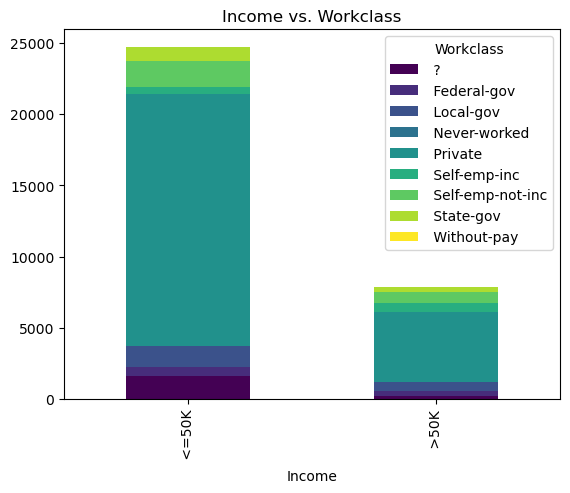

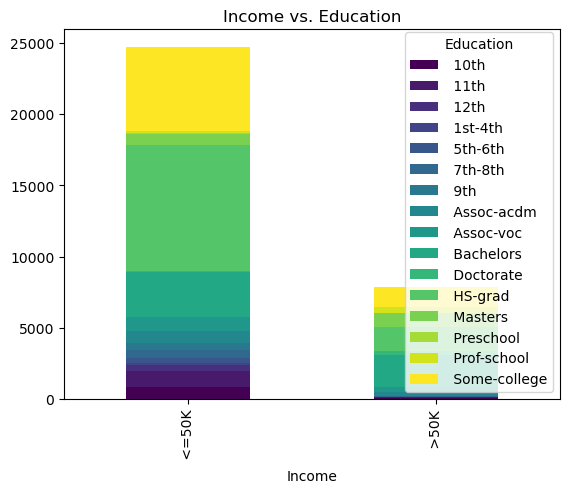

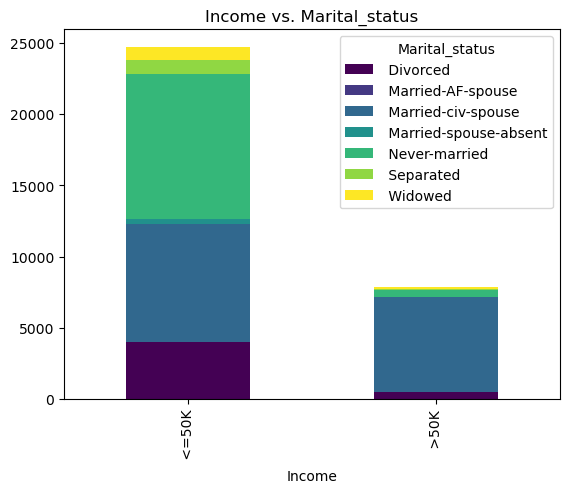

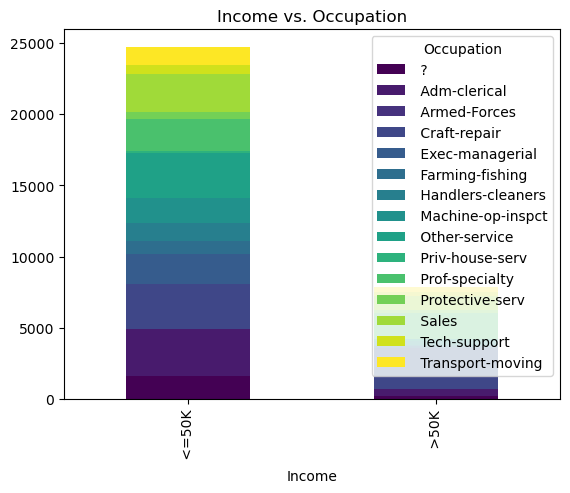

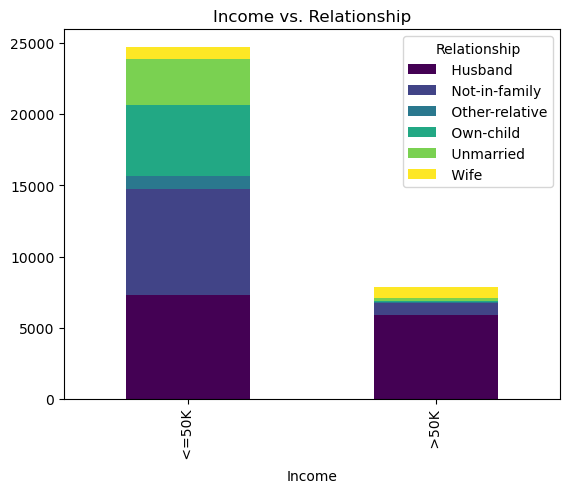

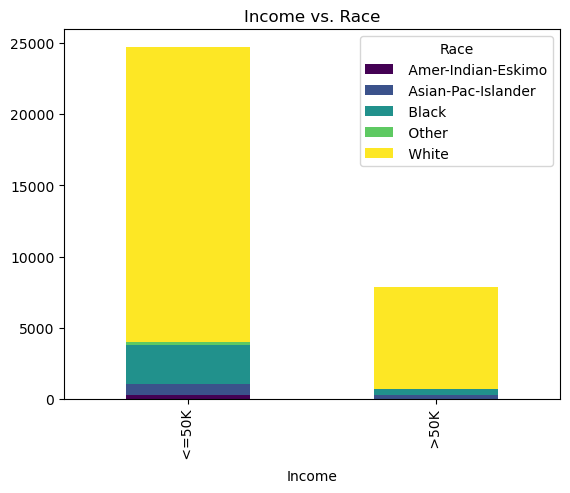

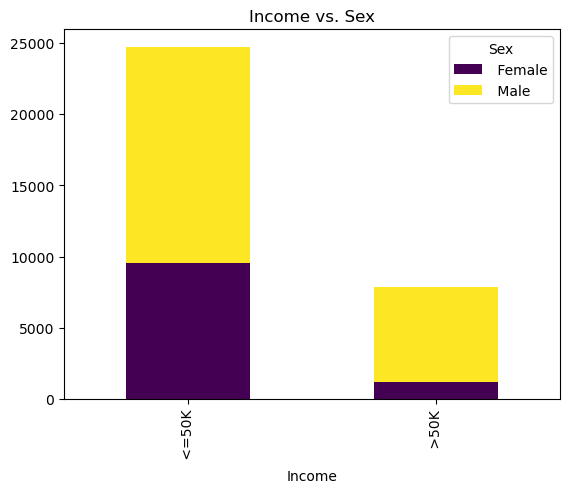

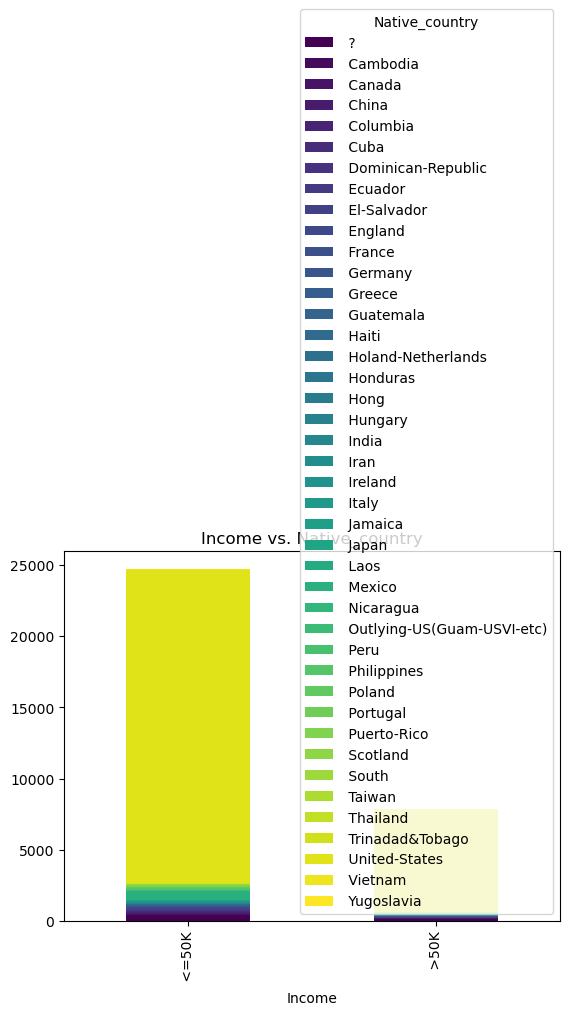

In [24]:
# Cross-tabulation and heatmaps for two categorical variables
for col1 in df.select_dtypes(include=['object']).columns:
    for col2 in df.select_dtypes(include=['object']).columns:
        if col1 != col2:
            pd.crosstab(df[col1], df[col2]).plot(kind='bar', stacked=True, colormap='viridis')
            plt.title(f'{col1} vs. {col2}')
            plt.show()


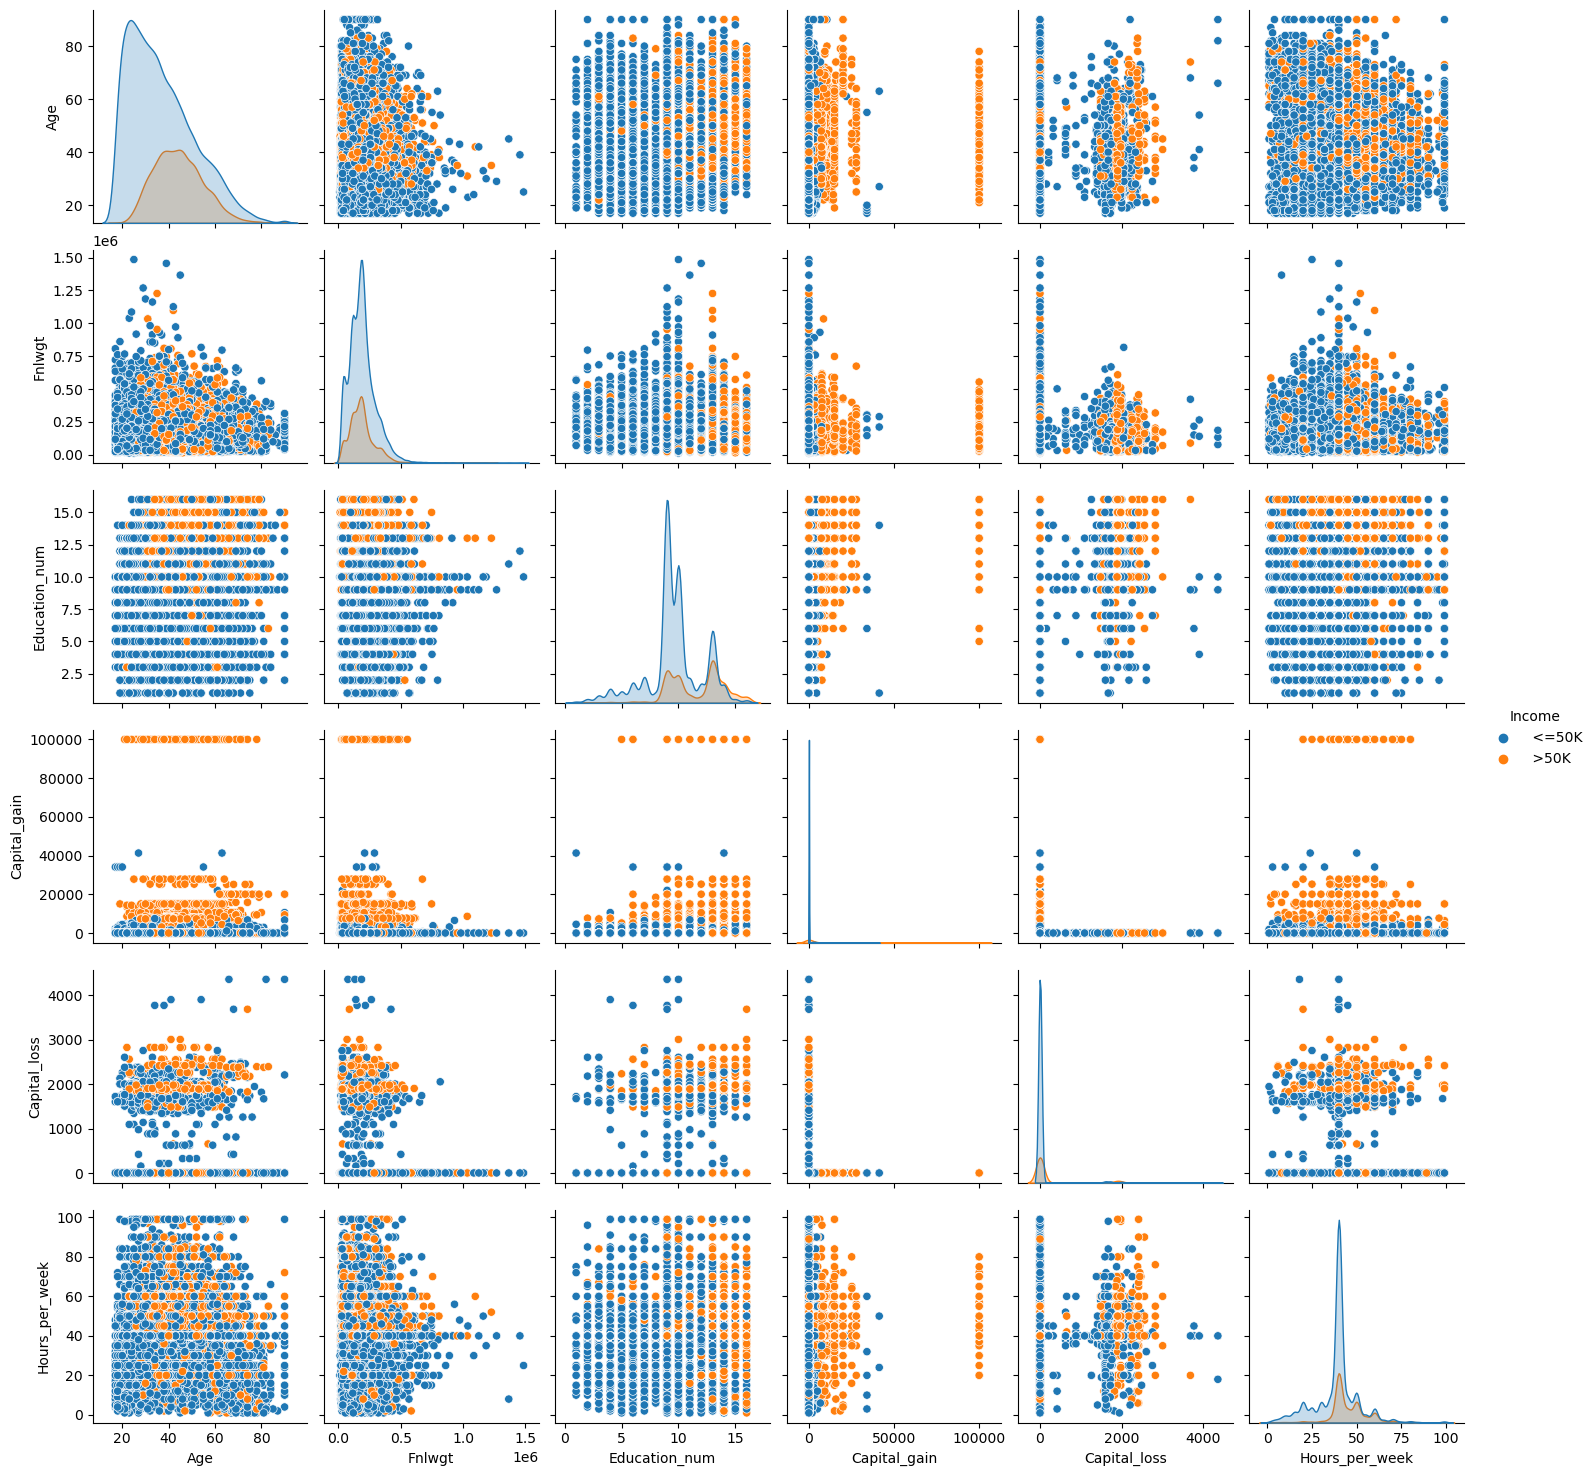

In [25]:
# Pair plots for multiple variables
sns.pairplot(df, hue='Income', diag_kind='kde')
plt.show()

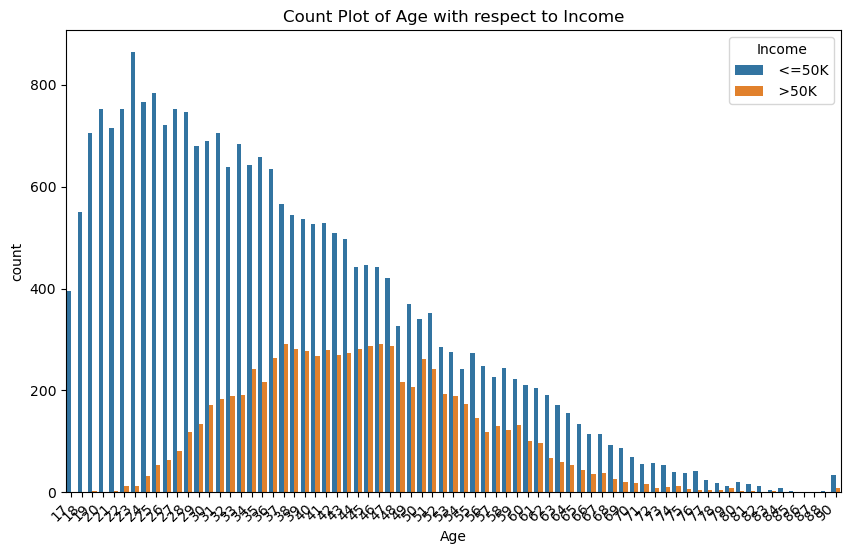

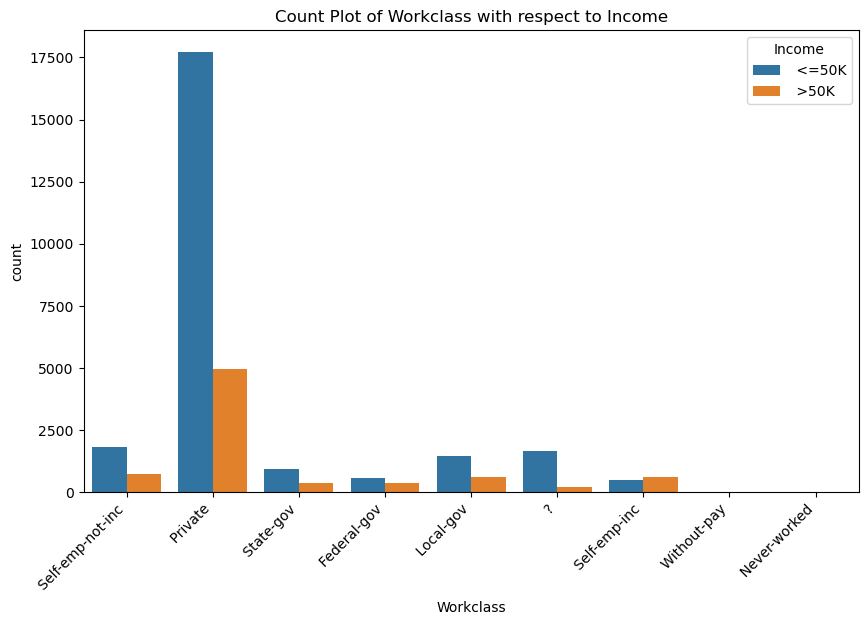

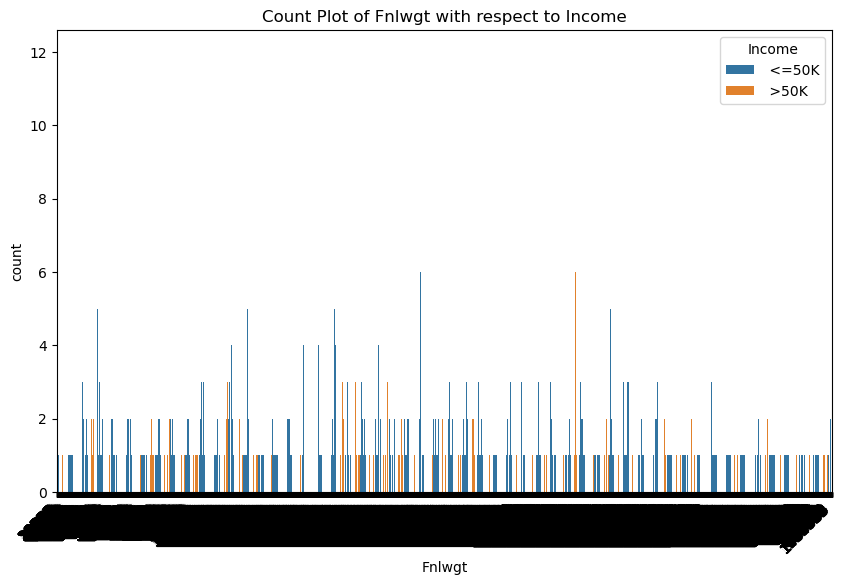

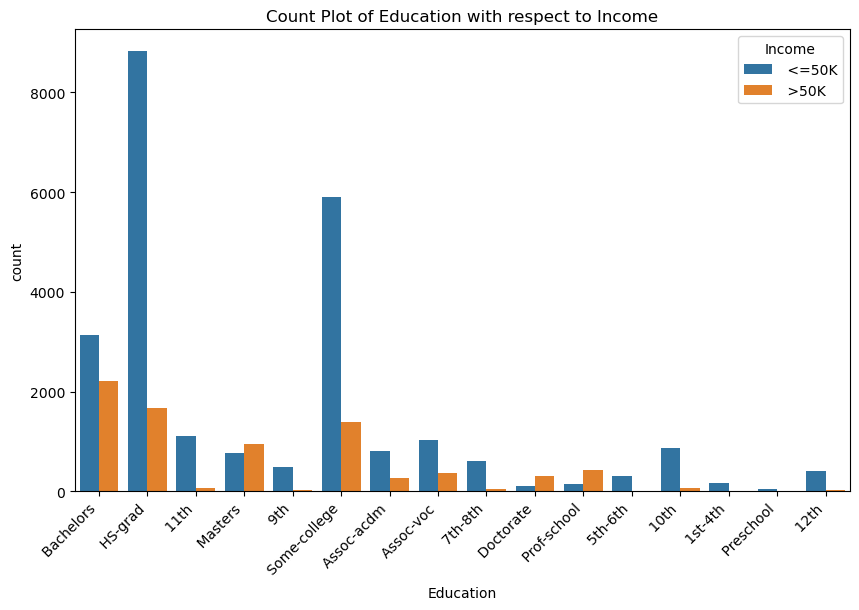

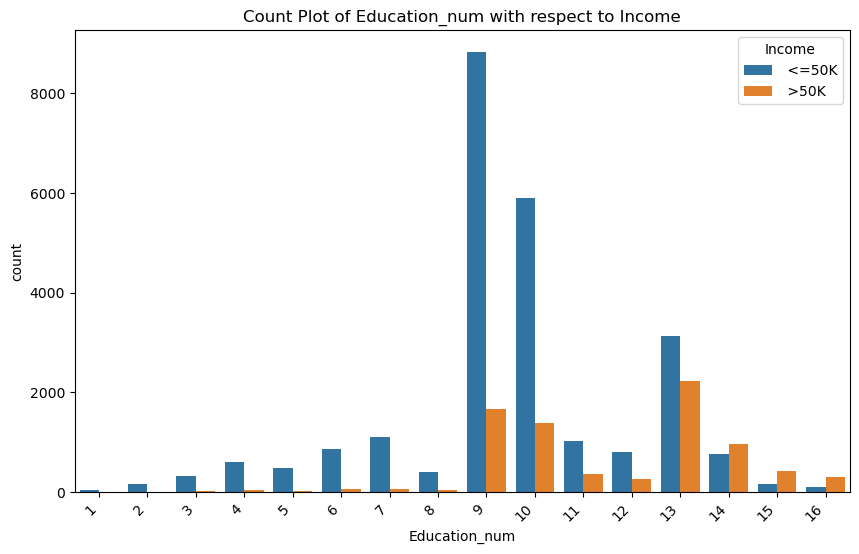

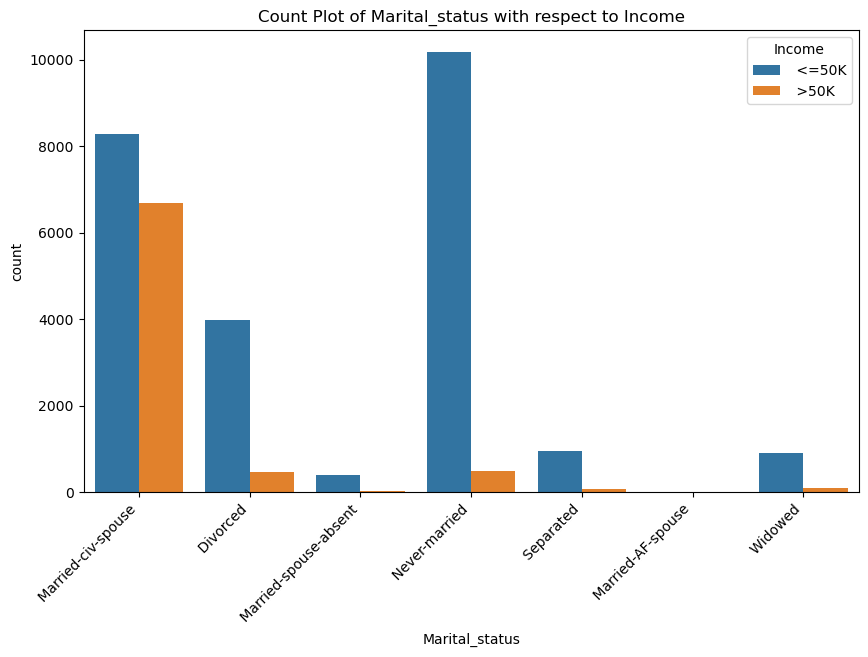

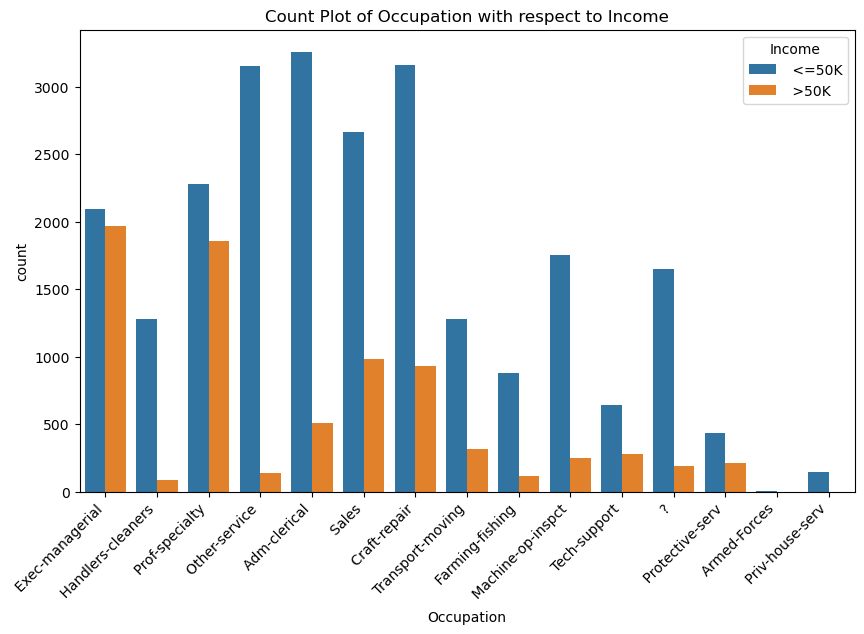

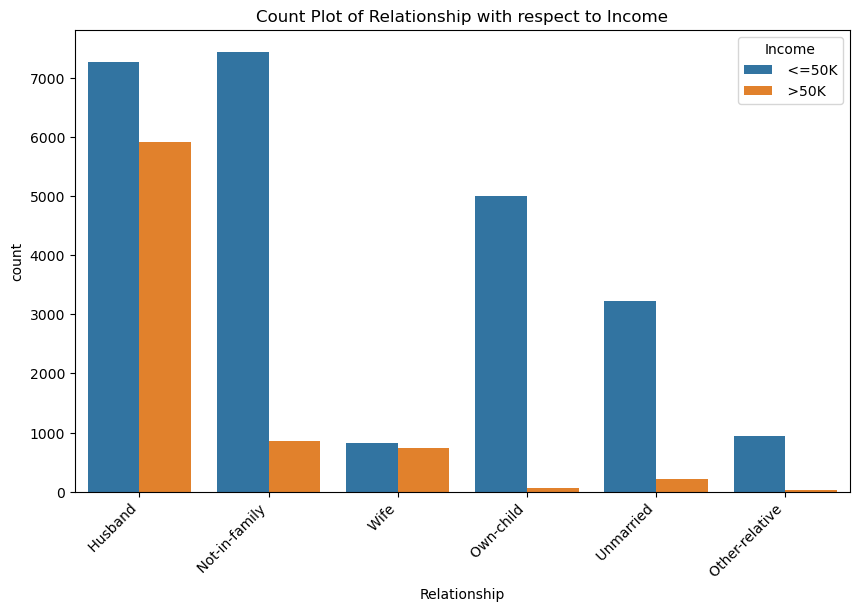

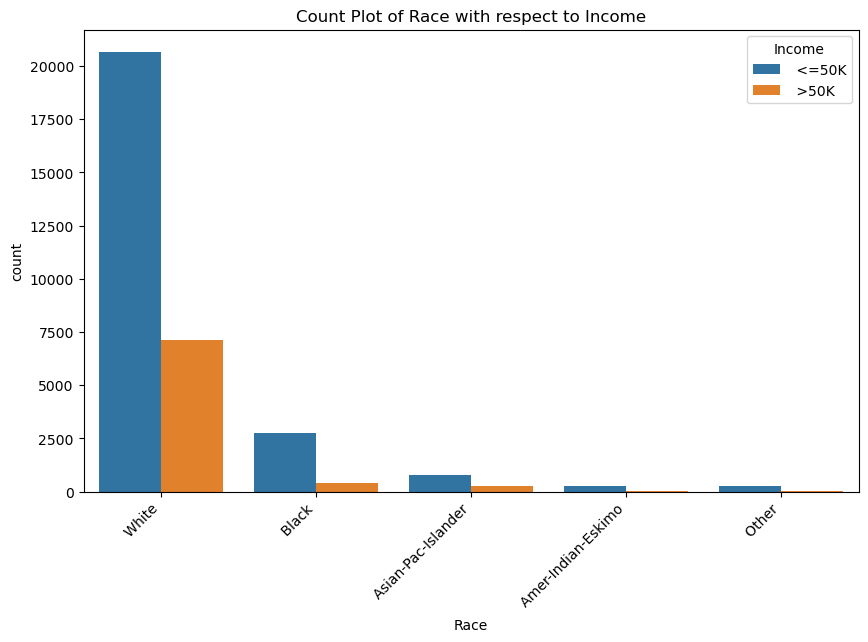

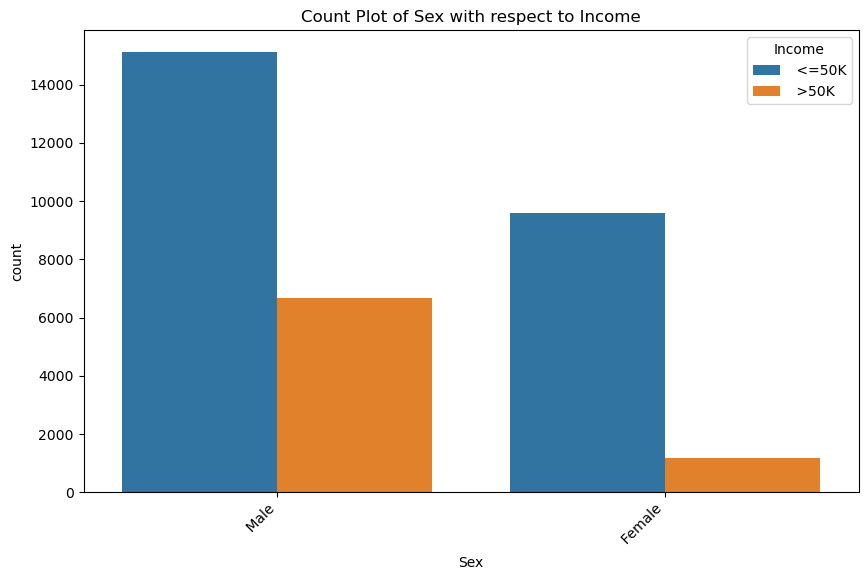

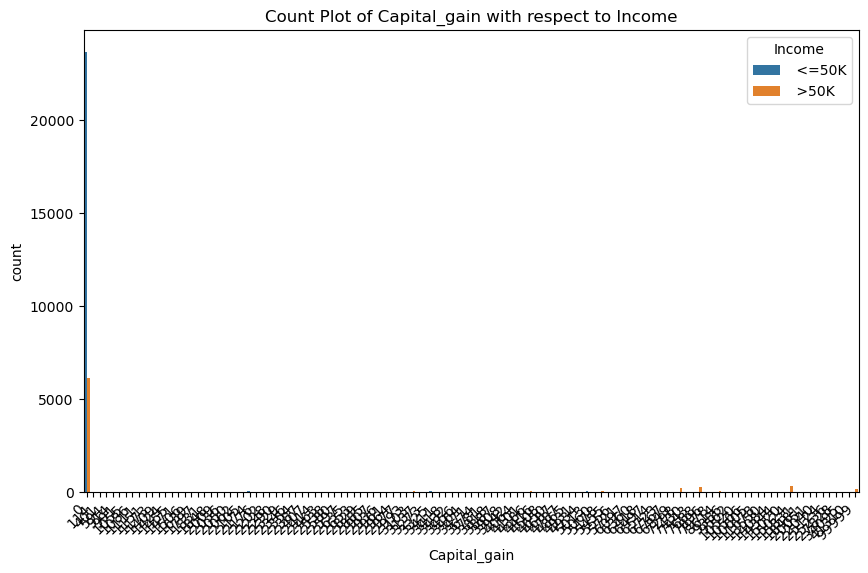

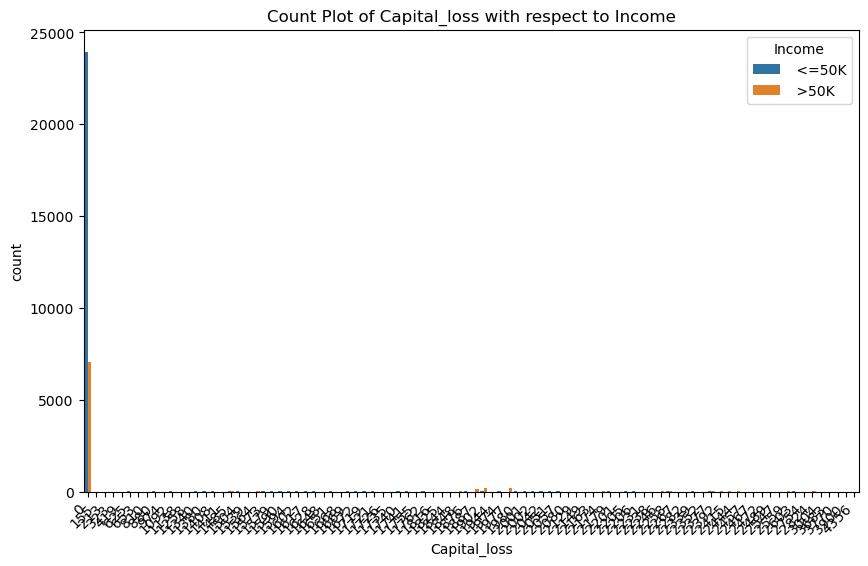

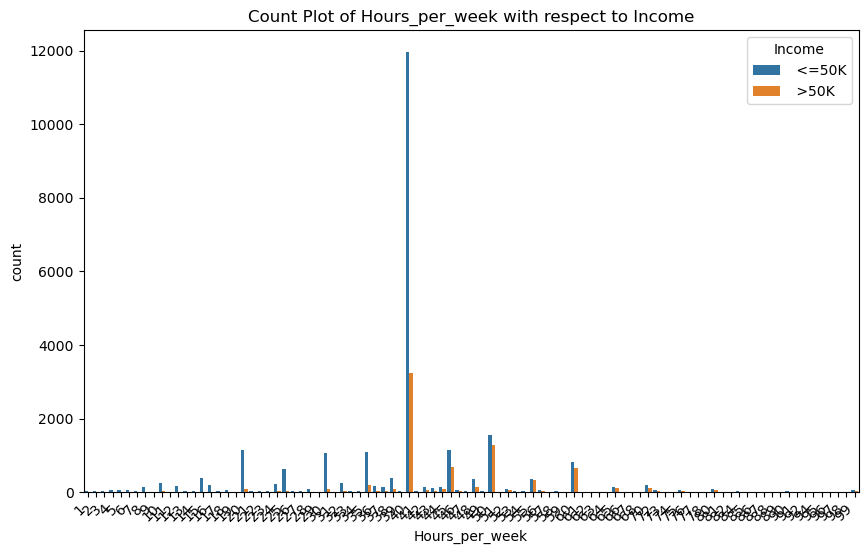

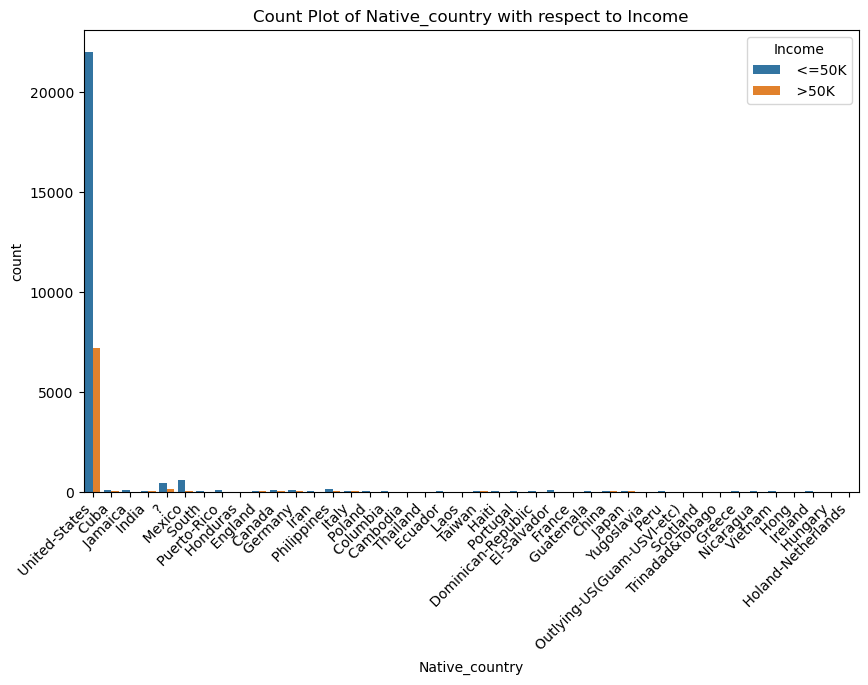

In [28]:
for column in df.columns:
    if column != 'Income':
        plt.figure(figsize=(10, 6))
        sns.countplot(x=column, hue='Income', data=df)
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Count Plot of {column} with respect to Income')
        plt.show()

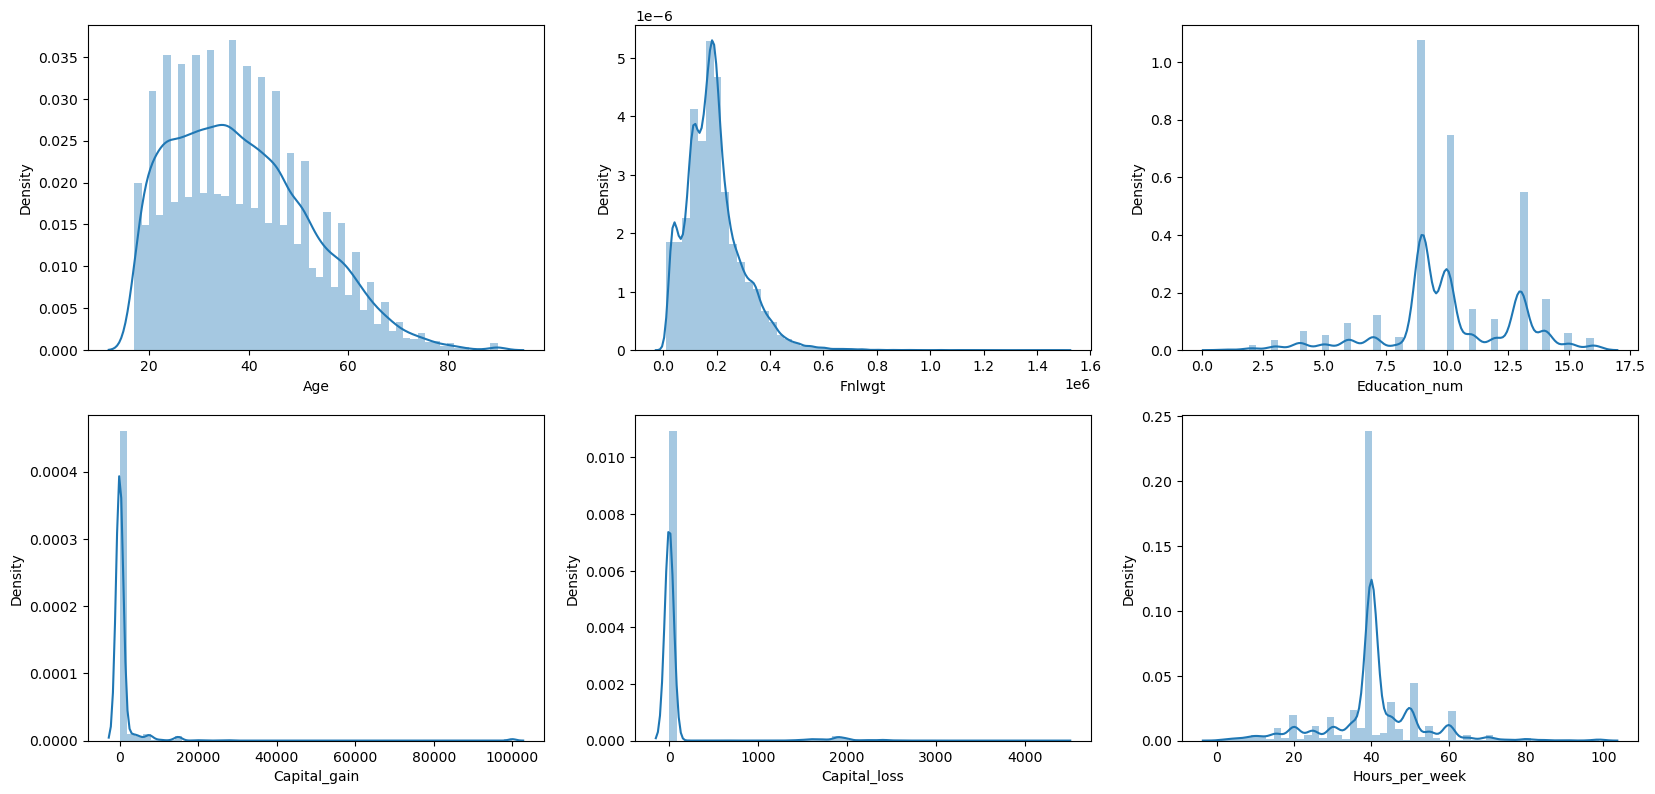

In [29]:
# checking how data is distributed for every column 
num_cols = df.select_dtypes(include=[np.number]).columns
plt.figure(figsize=(20,60),facecolor='white')

plotnumber=1
for i in num_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(df[i])
    plt.xlabel(i)
    plotnumber+=1
plt.show()

In [30]:
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32536.000000  3.253600e+04   32536.000000  32536.000000  32536.000000   
mean      38.585536  1.897843e+05      10.081725   1078.410069     87.370912   
std       13.638193  1.055563e+05       2.571622   7388.068465    403.107737   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.369932e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32536.000000  
mean        40.440343  
std         12.347079  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

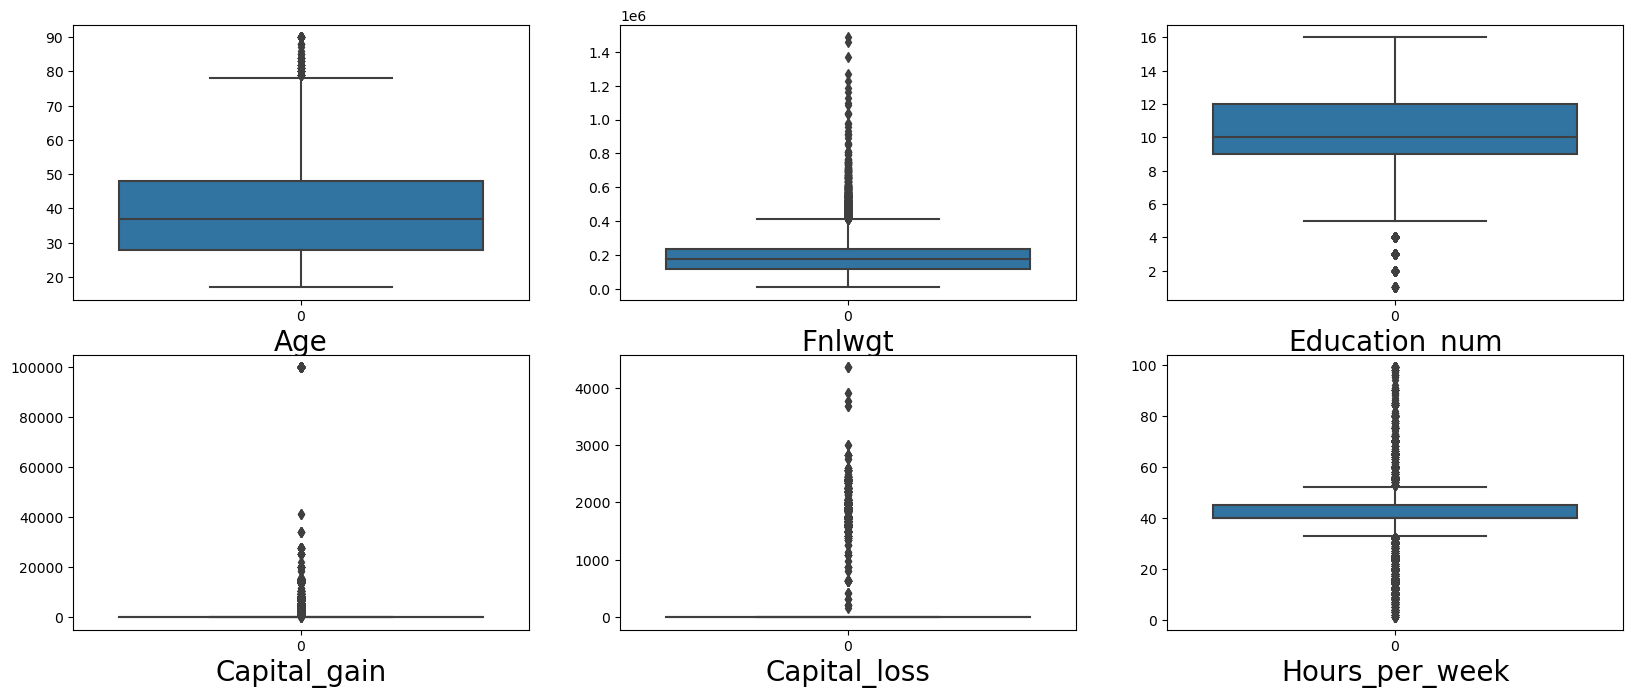

In [31]:
# Visualizing the outliers using boxplot
plt.figure(figsize=(20,25))
graph = 1

for column in num_cols:
    if graph<=16: 
        plt.subplot (6,3,graph) 
        ax=sns.boxplot(data=df[column])
        plt.xlabel(column, fontsize=20)
    
    graph+=1
plt.show()

There are outliers but We need not remove them as they are practically possible scenarios. WE'll check for skewnss now.

In [43]:
df.skew()

Age                0.557657
Fnlwgt             1.447695
Education_num     -0.309454
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
dtype: float64

In [44]:
skewed_columns = ['Fnlwgt','Capital_gain','Capital_loss']

for column in skewed_columns:
    df[column] = np.cbrt(df[column])

In [45]:
df.skew()

Age               0.557657
Fnlwgt           -0.163720
Education_num    -0.309454
Capital_gain      4.098390
Capital_loss      4.335154
Hours_per_week    0.228752
dtype: float64

In [46]:
skewed_columns = ['Capital_gain','Capital_loss']

for column in skewed_columns:
    df[column] = np.sqrt(df[column])

In [47]:
df.skew()

Age               0.557657
Fnlwgt           -0.163720
Education_num    -0.309454
Capital_gain      3.226138
Capital_loss      4.308589
Hours_per_week    0.228752
dtype: float64

In [48]:
skewed_columns = ['Capital_gain','Capital_loss']

for column in skewed_columns:
    df[column] = np.exp(df[column])

In [49]:
df.skew()

Age                0.557657
Fnlwgt            -0.163720
Education_num     -0.309454
Capital_gain      11.564960
Capital_loss       4.407264
Hours_per_week     0.228752
dtype: float64

In [52]:
skewed_columns = ['Capital_gain','Capital_loss']

for column in skewed_columns:
    df[column] = np.log1p(df[column])

In [53]:
df.skew()

Age               0.557657
Fnlwgt           -0.163720
Education_num    -0.309454
Capital_gain      3.056844
Capital_loss      4.301015
Hours_per_week    0.228752
dtype: float64

In [54]:
skewed_columns = ['Capital_gain','Capital_loss']

for column in skewed_columns:
    df[column] = df[column] ** 2

In [55]:
df.skew()

Age               0.557657
Fnlwgt           -0.163720
Education_num    -0.309454
Capital_gain      3.195776
Capital_loss      4.309579
Hours_per_week    0.228752
dtype: float64

In [56]:
from scipy.stats import yeojohnson

skewed_columns = ['Capital_gain','Capital_loss']

for column in skewed_columns:
    df[column], _ = yeojohnson(df[column] + 1)

In [57]:
df.skew()

Age               0.557657
Fnlwgt           -0.163720
Education_num    -0.309454
Capital_gain      3.015495
Capital_loss      0.000000
Hours_per_week    0.228752
dtype: float64

We have removed skewness from all columns except Capital_gain,As we have applied many transformation methods to it and skewness is still present there so we will keep it as it is and move ahead.

In [58]:
cor = df.corr()
cor

Age    Fnlwgt  Education_num  Capital_gain  Capital_loss  \
Age             1.000000 -0.067847       0.036224      0.120097      0.050502   
Fnlwgt         -0.067847  1.000000      -0.040897     -0.002577     -0.005827   
Education_num   0.036224 -0.040897       1.000000      0.115315      0.076360   
Capital_gain    0.120097 -0.002577       0.115315      1.000000     -0.066720   
Capital_loss    0.050502 -0.005827       0.076360     -0.066720      1.000000   
Hours_per_week  0.068515 -0.022800       0.148426      0.074997      0.050409   

                Hours_per_week  
Age                   0.068515  
Fnlwgt               -0.022800  
Education_num         0.148426  
Capital_gain          0.074997  
Capital_loss          0.050409  
Hours_per_week        1.000000

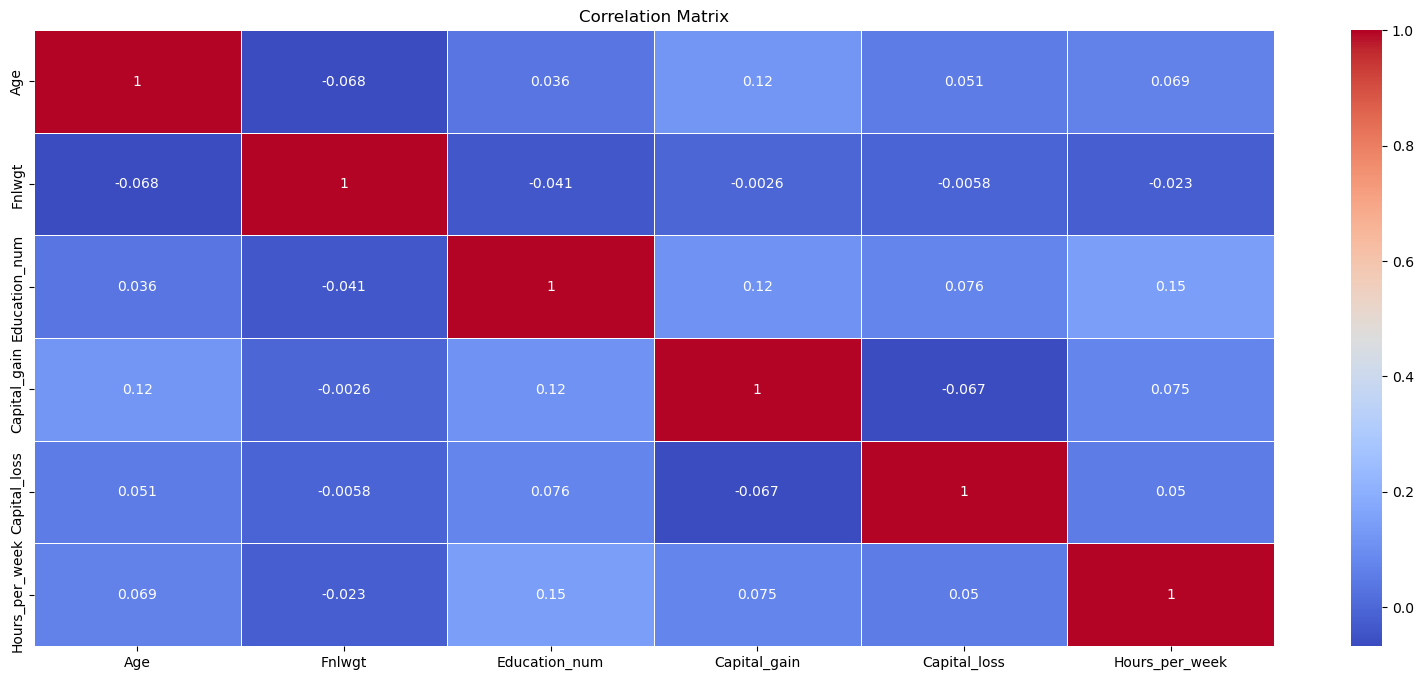

In [59]:
# visualizing the correlation matrix using a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(cor, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [61]:
df2 = pd.get_dummies(df, columns=['Workclass', 'Education', 'Marital_status', 
                                  'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country'], drop_first=False)


In [62]:
x = df2.drop('Income', axis=1)
y = df2['Income']


In [63]:
#Feature Scaling using Standard Scalarization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x= pd.DataFrame(scaler.fit_transform(x), columns = x.columns)
x

Age    Fnlwgt  Education_num  Capital_gain  Capital_loss  \
0      0.836961 -1.087390       1.134817     -0.301491     -0.221298   
1     -0.042934  0.417215      -0.420646     -0.301491     -0.221298   
2      1.056935  0.575915      -1.198377     -0.301491     -0.221298   
3     -0.776180  1.314791       1.134817     -0.301491     -0.221298   
4     -0.116259  0.953692       1.523683     -0.301491     -0.221298   
...         ...       ...            ...           ...           ...   
32531 -0.849505  0.753035       0.745951     -0.301491     -0.221298   
32532  0.103715 -0.166704      -0.420646     -0.301491     -0.221298   
32533  1.423558 -0.193204      -0.420646     -0.301491     -0.221298   
32534 -1.216128  0.293281      -0.420646     -0.301491     -0.221298   
32535  0.983611  0.977400      -0.420646      3.316889     -0.221298   

       Hours_per_week  Workclass_ ?  Workclass_ Federal-gov  \
0           -2.222450      -0.24455               -0.174364   
1           -0.035664      -0.24455               -0.174364   
2           -0.035664      -0.24455               -0.174364   
3           -0.035664      -0.24455               -0.174364   
4           -0.035664      -0.24455               -0.174364   
...               ...           ...                     ...   
32531       -0.197648      -0.24455               -0.174364   
32532       -0.035664      -0.24455               -0.174364   
32533       -0.035664      -0.24455               -0.174364   
32534       -1.655506      -0.24455               -0.174364   
32535       -0.035664      -0.24455               -0.174364   

       Workclass_ Local-gov  Workclass_ Never-worked  ...  \
0                 -0.262205                -0.014669  ...   
1                 -0.262205                -0.014669  ...   
2                 -0.262205                -0.014669  ...   
3                 -0.262205                -0.014669  ...   
4                 -0.262205                -0.014669  ...   
...                     ...                      ...  ...   
32531             -0.262205                -0.014669  ...   
32532             -0.262205                -0.014669  ...   
32533             -0.262205                -0.014669  ...   
32534             -0.262205                -0.014669  ...   
32535             -0.262205                -0.014669  ...   

       Native_country_ Portugal  Native_country_ Puerto-Rico  \
0                     -0.033742                    -0.059297   
1                     -0.033742                    -0.059297   
2                     -0.033742                    -0.059297   
3                     -0.033742                    -0.059297   
4                     -0.033742                    -0.059297   
...                         ...                          ...   
32531                 -0.033742                    -0.059297   
32532                 -0.033742                    -0.059297   
32533                 -0.033742                    -0.059297   
32534                 -0.033742                    -0.059297   
32535                 -0.033742                    -0.059297   

       Native_country_ Scotland  Native_country_ South  \
0                     -0.019208              -0.049648   
1                     -0.019208              -0.049648   
2                     -0.019208              -0.049648   
3                     -0.019208              -0.049648   
4                     -0.019208              -0.049648   
...                         ...                    ...   
32531                 -0.019208              -0.049648   
32532                 -0.019208              -0.049648   
32533                 -0.019208              -0.049648   
32534                 -0.019208              -0.049648   
32535                 -0.019208              -0.049648   

       Native_country_ Taiwan  Native_country_ Thailand  \
0                   -0.039623                 -0.023527   
1                   -0.039623                 -0.023527   
2             

In [64]:
# Checking variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]

print(vif_data)

                            Variable           VIF
0                                Age  1.747296e+00
1                             Fnlwgt  1.061808e+00
2                      Education_num  6.658958e+03
3                       Capital_gain  1.055243e+00
4                       Capital_loss  1.026871e+00
..                               ...           ...
103         Native_country_ Thailand  1.747142e+06
104  Native_country_ Trinadad&Tobago  2.114714e+07
105    Native_country_ United-States  1.209092e+05
106          Native_country_ Vietnam  1.603032e+07
107       Native_country_ Yugoslavia  2.218014e+07

[108 rows x 2 columns]


Clearly there is no multicollinerity exits. we will move ahead and check for best random state and accuracy.

In [65]:
# Checking for best random state and accuracy
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

best_RS = None
best_accuracy = 0.0

for i in range(1, 101):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=i)
    model = DecisionTreeClassifier()

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_RS = i

print(f'Best Random State: {best_RS}')
print(f'Best Accuracy: {best_accuracy:.2f}')


Best Random State: 73
Best Accuracy: 0.82


In [66]:
#splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_RS)

In [69]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2) 
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)  

In [70]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score 
from sklearn.model_selection import cross_val_score

In [71]:
models = [
    LogisticRegression(),
    RandomForestClassifier(),
    DecisionTreeClassifier(),
    SVC(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier()
]

for model in models:
    model_name = model.__class__.__name__
    
    # Fit the model
    model.fit(X_train_tsne, y_train)
    
    # Predictions
    y_pred = model.predict(X_test_tsne)
    y_pred_train = model.predict(X_train_tsne)
    
    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Cross-validation
    score = cross_val_score(model, x, y, cv=5, scoring="accuracy")
    
    # Printing results
    print(f"Results for {model_name}:")
    print('Accuracy: ', accuracy)
    print('Classification Report:\n', classification_rep)
    print('Confusion Matrix:\n', conf_matrix)
    
    # Cross-validating scores
    print("Cross-validation scores:", score)
    print("Mean Cross-validation score:", score.mean())
    print("Difference between Accuracy and cross-validation score is", (accuracy - score.mean()) * 100)
    
    print("\n" + "="*40 + "\n")


Results for LogisticRegression:
Accuracy:  0.7241061366663252
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.76      0.93      0.84      7434
        >50K       0.20      0.05      0.08      2327

    accuracy                           0.72      9761
   macro avg       0.48      0.49      0.46      9761
weighted avg       0.62      0.72      0.66      9761

Confusion Matrix:
 [[6949  485]
 [2208  119]]
Cross-validation scores: [0.84342348 0.83848164 0.84616567 0.84770247 0.84539726]
Mean Cross-validation score: 0.8442341040885571
Difference between Accuracy and cross-validation score is -12.012796742223198


Results for RandomForestClassifier:
Accuracy:  0.7011576682716935
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.77      0.86      0.81      7434
        >50K       0.30      0.19      0.24      2327

    accuracy                           0.70      9761
   macro avg       0.54

GradientBoostingClassifier is the best model. It achieves the highest mean cross-validation score (86.11%), Accuracy (71.47%) and performing well across all metrics.

In [72]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
}

# Initializing GridSearchCV
grid_search = GridSearchCV(GradientBoostingClassifier(), params, cv=5, scoring='accuracy')


In [73]:
# Fittng the model
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='accuracy')

In [74]:
# Getting the best parameters
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 150}


In [75]:
best_model = grid_search.best_estimator_

# Making predictions on the test set using the best model
pred = best_model.predict(X_test)

# Evaluating the best model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.77      0.86      0.81      7434
        >50K       0.30      0.20      0.24      2327

    accuracy                           0.70      9761
   macro avg       0.54      0.53      0.52      9761
weighted avg       0.66      0.70      0.68      9761

Confusion Matrix:
 [[6370 1064]
 [1873  454]]


In [76]:
#Saving the model using .pkl
import joblib
joblib.dump(best_model, "Census_Income.pkl")

['Census_Income.pkl']

In [77]:
# loading the saved model and get the predictions
model=joblib.load("Census_Income.pkl")

# Prediction
prediction = model.predict(X_test)
a = np.array(y_test)
df4 = pd.DataFrame()
df4["Predicted"] = prediction
df4["Original"] = a
df4

Predicted Original
0        <=50K    <=50K
1        <=50K    <=50K
2        <=50K    <=50K
3        <=50K    <=50K
4        <=50K    <=50K
...        ...      ...
9756     <=50K    <=50K
9757     <=50K    <=50K
9758     <=50K    <=50K
9759      >50K    <=50K
9760     <=50K    <=50K

[9761 rows x 2 columns]